# SMS Spam Detection with Natural Language Processing

# Load data

In [2]:
import os
import pandas as pd
import numpy as np


root_dir = "lingspam_public/bare"
df = []

# iterate through the 10 folders in the root directory
for i in range(1, 11):
    folder = os.path.join(root_dir, "part{}".format(i))
    file_list = os.listdir(folder)

    # iterate each file
    for file_name in file_list:
        with open(os.path.join(folder, file_name), "r") as f:
            file_content = f.readlines()

            # get label
            if "spm" in file_name:
                label = "spam"
            else:
                label = "non-spam"

            # get subject and main body
            if file_name == "Icon": continue
            if len(file_content) == 0:
                print(folder, file_name)
            else:
                subject = file_content[0].replace("Subject: ", "").strip()
            # use strip() to avoid the effect of line break \n
            main_body = "".join([line.strip() for line in file_content[1:]])

            # add to DataFrame
            df.append(pd.DataFrame({"label": label, "subject": subject, "main_body": main_body}, index=[0]))

# concat all data
df = pd.concat(df, ignore_index=True)

# replace "" to nan
df["label"].replace("", np.nan, inplace=True)
df["subject"].replace("", np.nan, inplace=True)
df["main_body"].replace("", np.nan, inplace=True)

In [3]:
df

,label,subject,main_body
0,non-spam,conference announcement,* * * * * * * * * * * * * * * * * * * * * firs...
1,spam,""" life without debt """,pardon the intrusion . no offence is meant . i...
2,spam,do want the best and economical hunting vacati...,if you want the best hunting and camping vacat...
3,non-spam,query : uninflected tags,does anybody know of recent work on uninflecte...
4,non-spam,no accent allowed !,has anybody else seen a weird piece in a newsp...
...,...,...,...
2888,non-spam,sla conference paris 1999,call for papers xi th international conference...
2889,non-spam,conference announcement,southern illinois university edwardsville and ...
2890,non-spam,semantics,we would like to bring to your attention to tw...
2891,non-spam,honored by two keynote speakers,international conference on natural language p...


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      2893 non-null   object
 1   subject    2831 non-null   object
 2   main_body  2893 non-null   object
 3   path       2893 non-null   object
dtypes: object(4)
memory usage: 90.5+ KB


In [4]:
df.head()

,label,subject,main_body,path
0,non-spam,conference announcement,* * * * * * * * * * * * * * * * * * * * * firs...,lingspam_public/bare/part1/5-1268msg3.txt
1,spam,""" life without debt """,pardon the intrusion . no offence is meant . i...,lingspam_public/bare/part1/spmsga114.txt
2,spam,do want the best and economical hunting vacati...,if you want the best hunting and camping vacat...,lingspam_public/bare/part1/spmsga100.txt
3,non-spam,query : uninflected tags,does anybody know of recent work on uninflecte...,lingspam_public/bare/part1/3-565msg2.txt
4,non-spam,no accent allowed !,has anybody else seen a weird piece in a newsp...,lingspam_public/bare/part1/3-553msg0.txt


In [5]:
# spam vs non spam
df['label'].value_counts()

non-spam    2412
spam         481
Name: label, dtype: int64

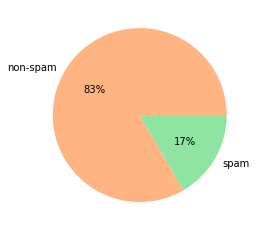

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')[1:3]
plt.pie(df['label'].value_counts(), labels = ['non-spam','spam'], colors = colors, autopct='%.0f%%')
plt.show()

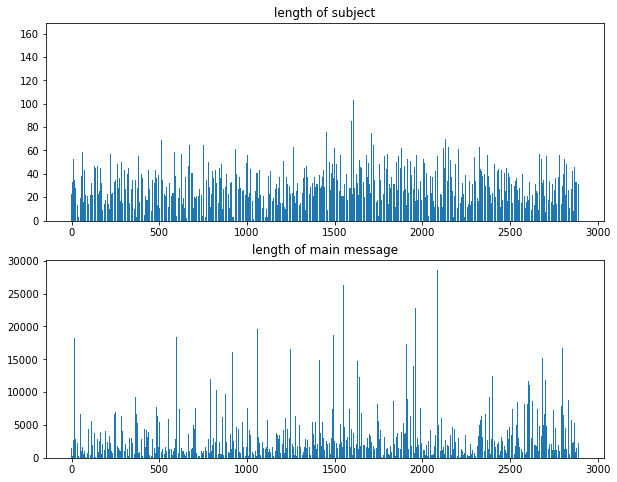

In [7]:
# length of each message raw data
length = np.zeros((df.shape[0],2))
x = np.arange(df.shape[0])
for i in range(df.shape[0]):
    length[i,0] = len(df['subject'].astype(str)[i])
    length[i,1] = len(df['main_body'][i])

fig, (ax0,ax1) = plt.subplots(nrows=2,figsize= (10,8))
ax0.bar(x, length[:,0])
ax1.bar(x, length[:,1])
ax0.set_title("length of subject")
ax1.set_title("length of main message")
fig.subplots_adjust(hspace=0.2)
plt.show()


In [8]:
df['length_s']= pd.Series(length[:,0])
df['length_b']= pd.Series(length[:,1])
checkdf = df.loc[df['length_b'] <= 1024]
checkdf['label'].value_counts()

non-spam    600
spam        176
Name: label, dtype: int64

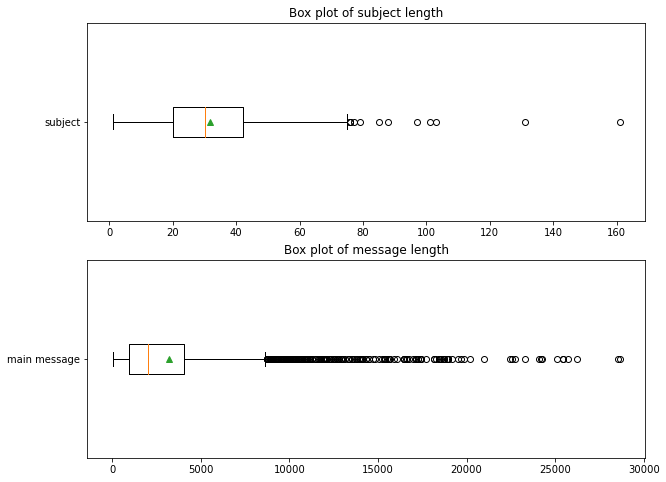

In [9]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

bplot1 = ax1.boxplot(length[:,0], vert = False, labels = ['subject'],showmeans=True, showfliers = True)  
ax1.set_title('Box plot of subject length')
bplot2 = ax2.boxplot(length[:,1], vert = False, labels = ['main message'],showmeans=True,showfliers = True) 
ax2.set_title('Box plot of message length')
plt.show()

In [10]:
cleaned_df = pd.read_csv('cleaned_data1.csv')
cleaned_df.head()

,label,subject,main_body,path,length
0,non-spam,number number np np,date sun number dec number number number numbe...,lingspam_public/bare\part1/3-1msg1.txt,626
1,non-spam,np np,discussion np np remind years ago read source ...,lingspam_public/bare\part1/3-1msg2.txt,295
2,non-spam,number number np np,much restrictive np np np pro quite overrestri...,lingspam_public/bare\part1/3-1msg3.txt,51
3,non-spam,gent conference,listserv international conference number secon...,lingspam_public/bare\part1/3-375msg1.txt,5491
4,non-spam,query causatives korean,could anyone point book article causative cons...,lingspam_public/bare\part1/3-378msg1.txt,137


In [11]:
from nltk.tokenize import wordpunct_tokenize
cleaned_df['tokenlize'] = [wordpunct_tokenize(w) for w in cleaned_df['main_body']]

In [12]:
cleaned_df.head()

,label,subject,main_body,path,length,tokenlize
0,non-spam,number number np np,date sun number dec number number number numbe...,lingspam_public/bare\part1/3-1msg1.txt,626,"[date, sun, number, dec, number, number, numbe..."
1,non-spam,np np,discussion np np remind years ago read source ...,lingspam_public/bare\part1/3-1msg2.txt,295,"[discussion, np, np, remind, years, ago, read,..."
2,non-spam,number number np np,much restrictive np np np pro quite overrestri...,lingspam_public/bare\part1/3-1msg3.txt,51,"[much, restrictive, np, np, np, pro, quite, ov..."
3,non-spam,gent conference,listserv international conference number secon...,lingspam_public/bare\part1/3-375msg1.txt,5491,"[listserv, international, conference, number, ..."
4,non-spam,query causatives korean,could anyone point book article causative cons...,lingspam_public/bare\part1/3-378msg1.txt,137,"[could, anyone, point, book, article, causativ..."


In [42]:
spam_df = cleaned_df.loc[cleaned_df.label =='spam']
spam_df.head()

,label,subject,main_body,path,length,tokenlize,lemmalize,sentiment
217,spam,great parttime summer job,display box credit applications need place sma...,lingspam_public/bare\part1/spmsga1.txt,693,"[display, box, credit, applications, need, pla...",display box credit applications need place sma...,0.097775
218,spam,auto insurance rat high,dear nlpeople sure agree auto insurance cost m...,lingspam_public/bare\part1/spmsga10.txt,761,"[dear, nlpeople, sure, agree, auto, insurance,...",dear nlpeople sure agree auto insurance cost m...,0.297500
219,spam,want best economical hunt vacation life,want best hunt camp vacation life come felton ...,lingspam_public/bare\part1/spmsga100.txt,445,"[want, best, hunt, camp, vacation, life, come,...",want best hunt camp vacation life come felton ...,0.475000
220,spam,email number million people number,number million email address number want make ...,lingspam_public/bare\part1/spmsga101.txt,2787,"[number, million, email, address, number, want...",number million email address number want make ...,0.255298
221,spam,nt miss,attention warn adults warn adults number years...,lingspam_public/bare\part1/spmsga102.txt,3961,"[attention, warn, adults, warn, adults, number...",attention warn adults warn adults number years...,0.231160


In [43]:
wordlist = []
for words in cleaned_df['tokenlize']:
    wordlist += words
wordlist_spam = []
for words in spam_df['tokenlize']:
    wordlist_spam += words

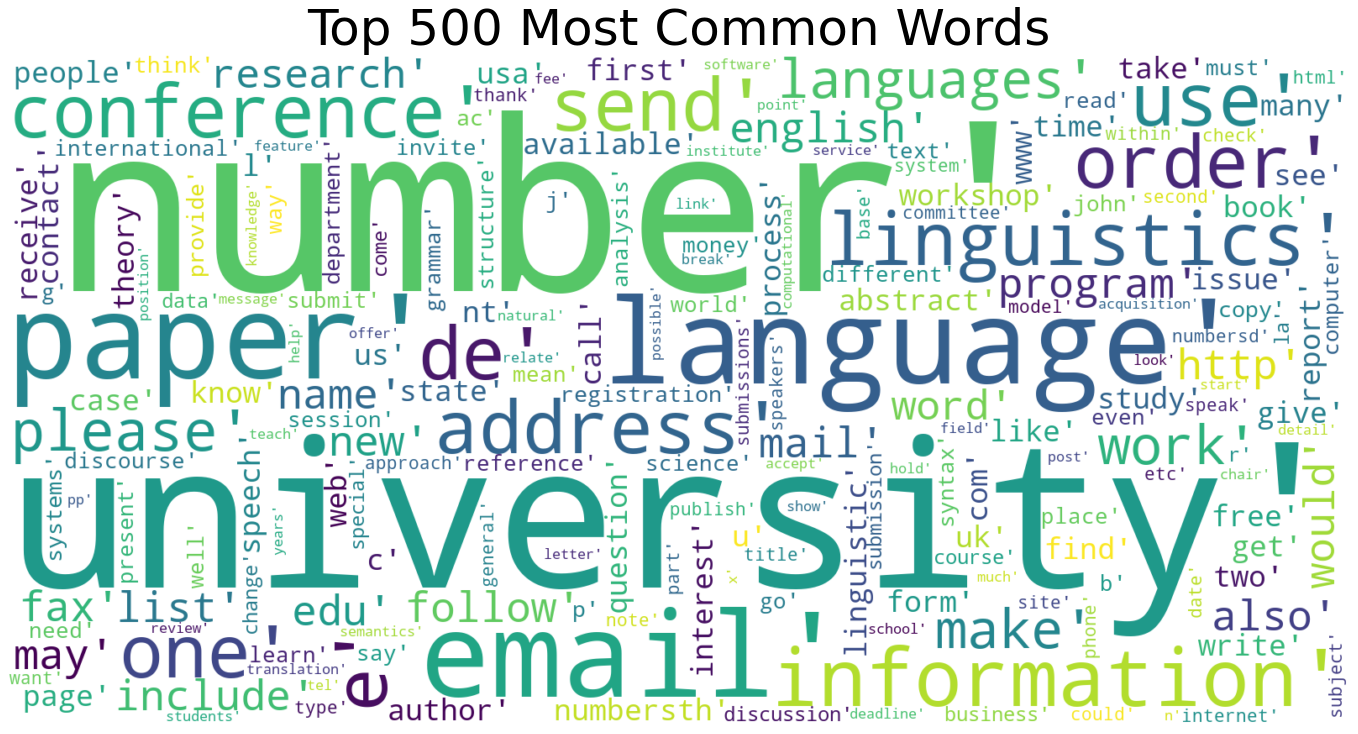

In [15]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.probability import FreqDist
topwords = FreqDist(wordlist).most_common(500)

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(topwords))

fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 500 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

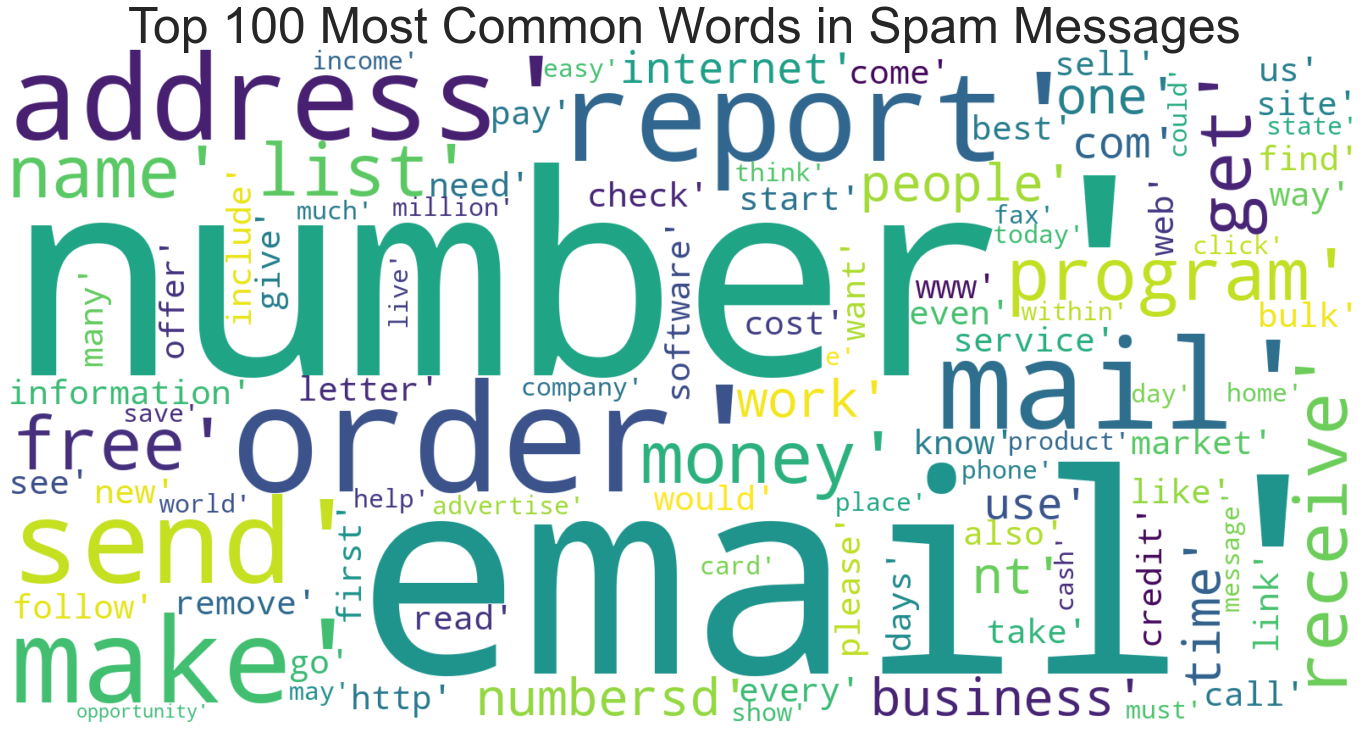

In [44]:
topwords_spam = FreqDist(wordlist_spam).most_common(100)

wordcloud_spam = WordCloud(width=1600, height=800, background_color='white').generate(str(topwords_spam))

fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Spam Messages', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

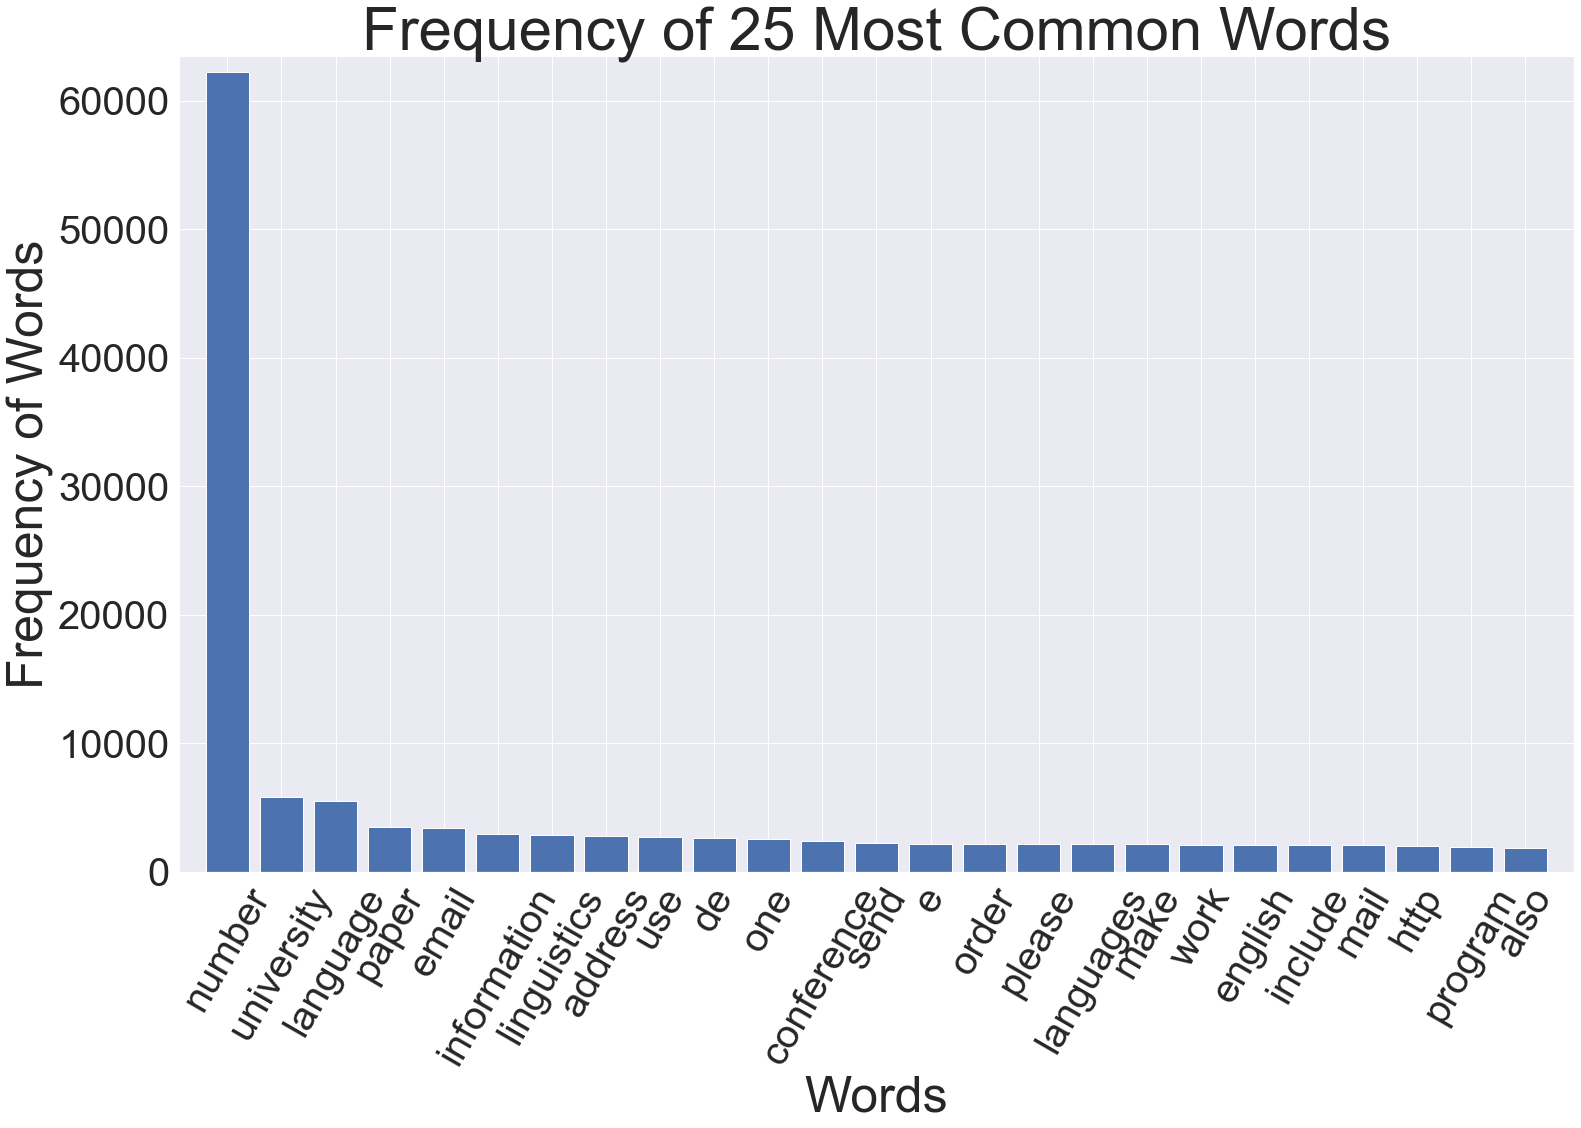

In [48]:
topwords25 = FreqDist(wordlist).most_common(25)
x, y = zip(*topwords25)
plt.figure(figsize=(25,15))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

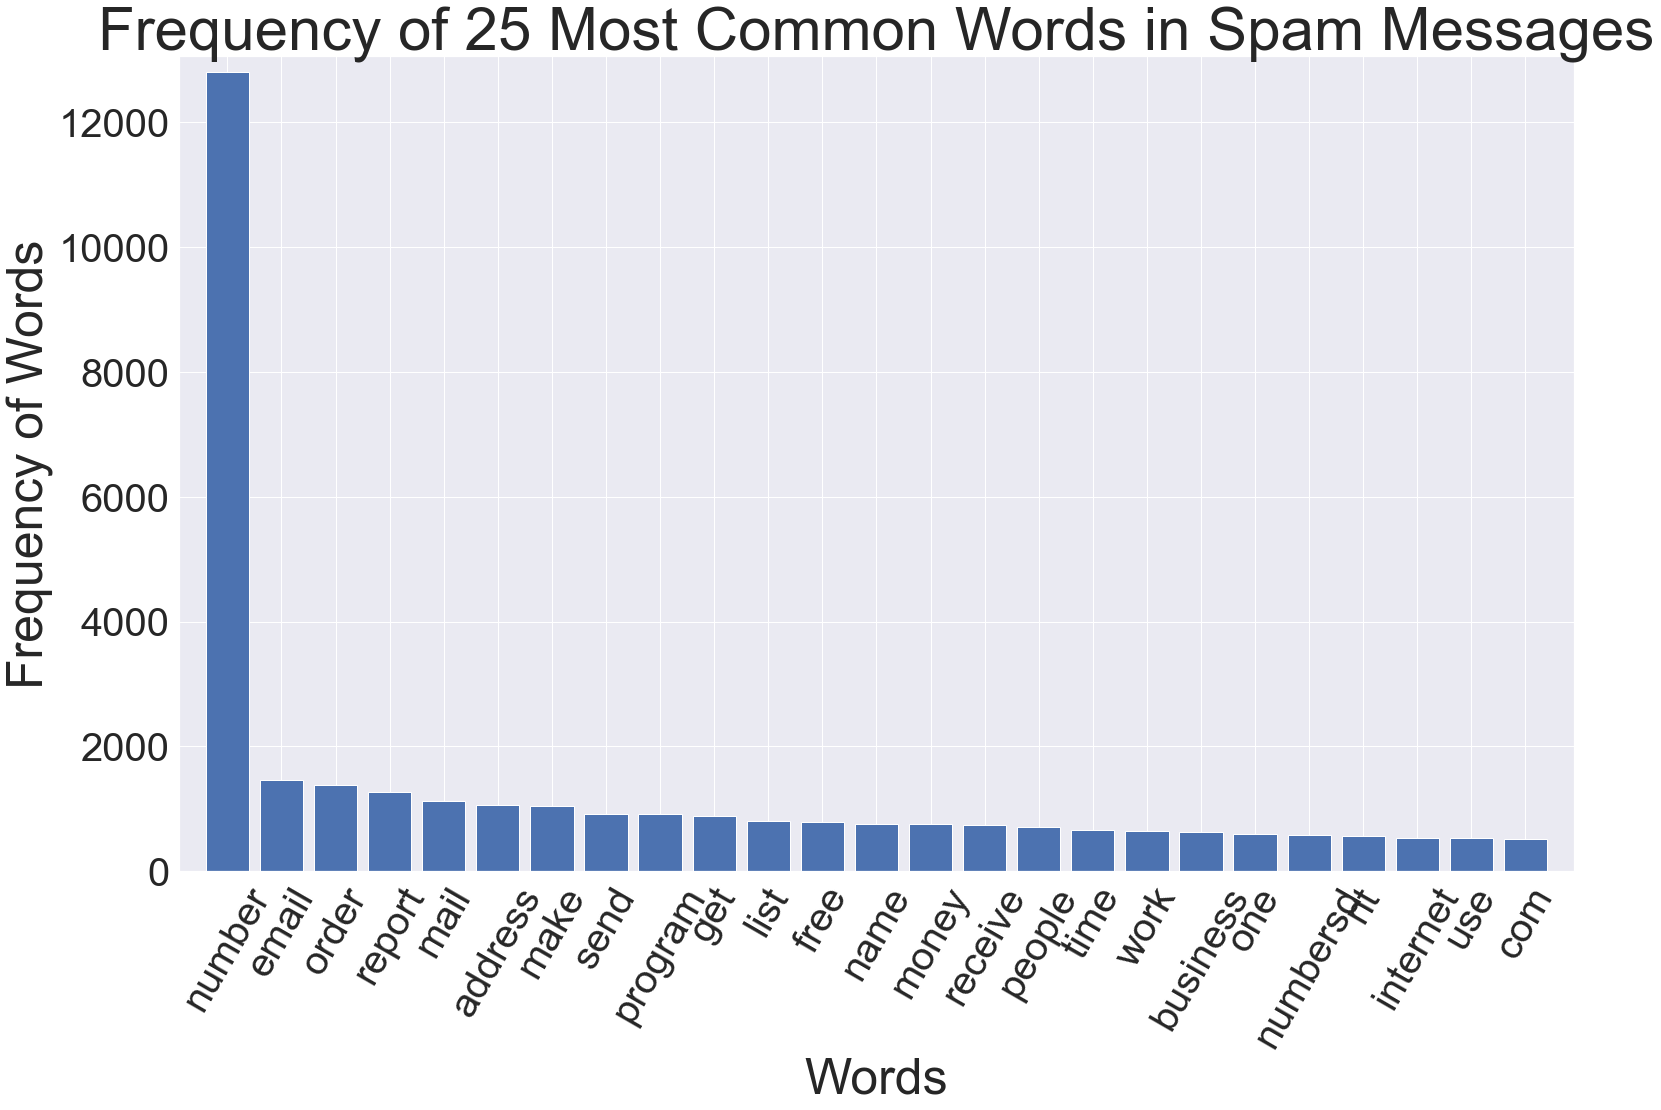

In [47]:
topwords25_spam = FreqDist(wordlist_spam).most_common(25)
x_spam, y_spam = zip(*topwords25_spam)
plt.figure(figsize=(25,15))
plt.margins(0.02)
plt.bar(x_spam, y_spam)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words in Spam Messages', fontsize=60)
plt.show()

In [18]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet') 
lemmatizer = WordNetLemmatizer()   
cleaned_df['lemmalize'] = [lemmatizer.lemmatize(w) for w in cleaned_df['main_body']]

[nltk_data] Downloading package wordnet to /Users/lucyy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
cleaned_df['lemmalize'].head()

0    date sun number dec number number number numbe...
1    discussion np np remind years ago read source ...
2    much restrictive np np np pro quite overrestri...
3    listserv international conference number secon...
4    could anyone point book article causative cons...
Name: lemmalize, dtype: object

In [20]:
# cleaned_df['lemma_str'] = [' '.join(map(str,l)) for l in cleaned_df['lemmalize']]

In [21]:
cleaned_df['sentiment'] = cleaned_df['lemmalize'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [22]:
cleaned_df['sentiment'].describe()

count    2596.000000
mean        0.094988
std         0.114295
min        -0.600000
25%         0.026182
50%         0.081061
75%         0.146758
max         1.000000
Name: sentiment, dtype: float64

In [38]:
spam_df = cleaned_df.loc[cleaned_df.label =='spam']
spam_df.head()

,label,subject,main_body,path,length,tokenlize,lemmalize,sentiment
217,spam,great parttime summer job,display box credit applications need place sma...,lingspam_public/bare\part1/spmsga1.txt,693,"[display, box, credit, applications, need, pla...",display box credit applications need place sma...,0.097775
218,spam,auto insurance rat high,dear nlpeople sure agree auto insurance cost m...,lingspam_public/bare\part1/spmsga10.txt,761,"[dear, nlpeople, sure, agree, auto, insurance,...",dear nlpeople sure agree auto insurance cost m...,0.297500
219,spam,want best economical hunt vacation life,want best hunt camp vacation life come felton ...,lingspam_public/bare\part1/spmsga100.txt,445,"[want, best, hunt, camp, vacation, life, come,...",want best hunt camp vacation life come felton ...,0.475000
220,spam,email number million people number,number million email address number want make ...,lingspam_public/bare\part1/spmsga101.txt,2787,"[number, million, email, address, number, want...",number million email address number want make ...,0.255298
221,spam,nt miss,attention warn adults warn adults number years...,lingspam_public/bare\part1/spmsga102.txt,3961,"[attention, warn, adults, warn, adults, number...",attention warn adults warn adults number years...,0.231160


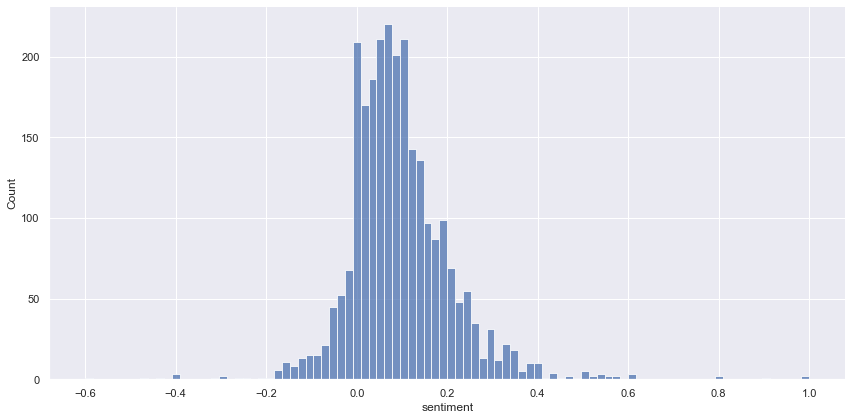

In [23]:
sns.set(rc={'figure.figsize':(10,20)})
sns.displot(data=cleaned_df, x='sentiment',height=6, aspect=2)

[Text(0.5, 1.0, 'sentiment CDF of messages')]

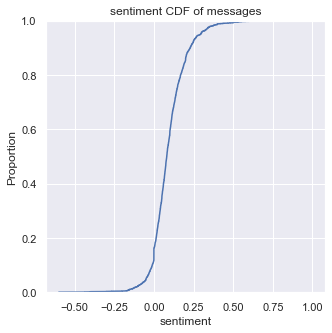

In [37]:
sns.set(rc={'figure.figsize':(5,5)})
sns.ecdfplot(data=cleaned_df, x='sentiment').set(title = 'sentiment CDF of messages')

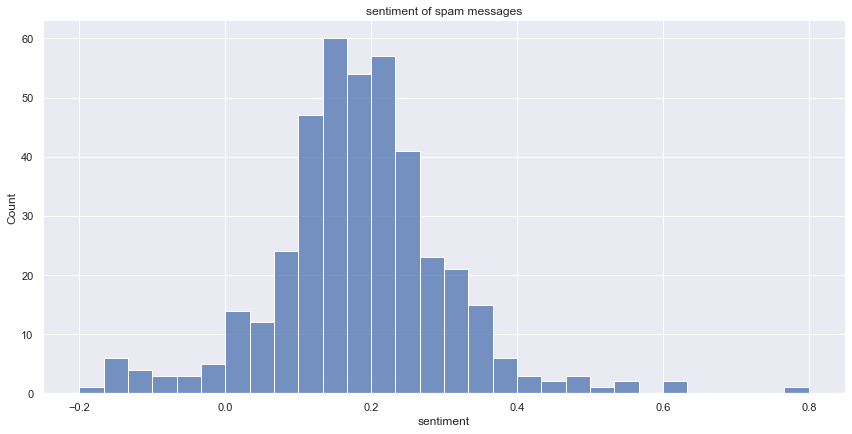

In [30]:
sns.set(rc={'figure.figsize':(10,20)})
sns.displot(data=spam_df, x='sentiment',height=6, aspect=2).set(title = 'sentiment of spam messages')

[Text(0.5, 1.0, 'sentiment CDF of spam messages')]

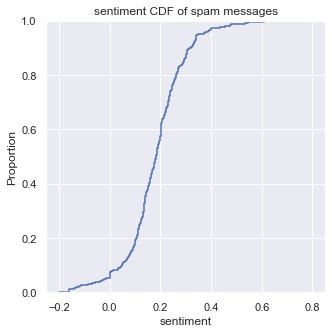

In [35]:
sns.set(rc={'figure.figsize':(5,5)})
sns.ecdfplot(data=spam_df, x='sentiment').set(title = 'sentiment CDF of spam messages')

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(cleaned_df['main_body'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
words_vector = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
words_vector

,ability,able,absence,absolutely,abstract,ac,academia,academic,academy,accent,...,years,yes,yet,yield,yorick,york,young,zero,zip,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2594,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
number university linguistics abstract paper conference edu email please address
Topic 1:
number email mail address order free send list please internet
Topic 2:
number report order program make email name send money receive
Topic 3:
number de la registration conference et fee en fax des
Topic 4:
http www com web number numbersd link site html benjamins
Topic 5:
number english languages word language use edu also form reference
Topic 6:
would one know nt like people use make say go
Topic 7:
language number linguistics study english teach research university course languages
Topic 8:
number paper workshop information university conference research language include email
Topic 9:
number language theory structure book linguistic grammar case use order


In [40]:
tf_vectorizer_spam = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf_spam = tf_vectorizer_spam.fit_transform(spam_df['main_body'].values.astype('U'))
tf_feature_names_spam = tf_vectorizer_spam.get_feature_names()
words_vector_spam = pd.DataFrame(tf_spam.toarray(), columns=list(tf_feature_names_spam))
words_vector_spam

,able,absolutely,accept,access,account,achieve,acquire,action,actually,ad,...,world,worldwide,worth,would,write,www,year,years,yes,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,2,0,0,0,0,2,0,0,...,6,0,0,0,0,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,14,0,0,0,0
408,1,0,0,0,0,0,3,0,0,0,...,0,0,0,1,0,2,0,0,0,0


In [41]:
lda_model_spam = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf_spam)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model_spam, tf_feature_names_spam, no_top_words)

Topic 0:
service company offer save bill price market may group rat
Topic 1:
http com link www free new web win go click
Topic 2:
time sex video order world mail see phone card ship
Topic 3:
paper sorry super friend hello opportunities trade industry feel something
Topic 4:
email mail web remove site software message send list internet
Topic 5:
game like search investment would register different talk adult program
Topic 6:
order information credit find internet sound even know card want
Topic 7:
address email order list fax check cd million file send
Topic 8:
report order program make email send name receive get people
Topic 9:
call business money make free pay time earn market get


## Data Pre-processing

In [4]:
# check null values
df.isnull().sum()

label         0
subject      62
main_body     0
dtype: int64

In [5]:
# reference: https://www.kaggle.com/code/surekharamireddy/spam-detection-with-99-accuracy
'''
Data Cleaning: Handling of Incomplete & Missing Data

miss label - drop
miss subject - keep
miss main body - drop
'''
# replace with "missing" if miss subject
df["subject"].fillna("missing", inplace=True)

# drop row if miss label or main body
df.dropna(subset=["label"], inplace=True)
df.dropna(subset=["main_body"], inplace=True)

df

,label,subject,main_body
0,non-spam,conference announcement,* * * * * * * * * * * * * * * * * * * * * firs...
1,spam,""" life without debt """,pardon the intrusion . no offence is meant . i...
2,spam,do want the best and economical hunting vacati...,if you want the best hunting and camping vacat...
3,non-spam,query : uninflected tags,does anybody know of recent work on uninflecte...
4,non-spam,no accent allowed !,has anybody else seen a weird piece in a newsp...
...,...,...,...
2888,non-spam,sla conference paris 1999,call for papers xi th international conference...
2889,non-spam,conference announcement,southern illinois university edwardsville and ...
2890,non-spam,semantics,we would like to bring to your attention to tw...
2891,non-spam,honored by two keynote speakers,international conference on natural language p...


In [6]:
'''
Data Cleaning: Handling of Noisy Data

noisy data -> meaningless data: all punctuations -> drop
noisy data -> redundant data: repetitive data -> drop
# REPLACING EMAIL IDs BY 'MAILID'
# REPLACING URLs  BY 'Links'
# REPLACING CURRENCY SIGNS BY 'MONEY'
# REPLACINg NUMBERS by 'numbers'
'''

# drop all punctuations
df['subject'] = df['subject'].str.replace(r'[^\w\s]', '', regex=True)
df['main_body'] = df['main_body'].str.replace(r'[^\w\s]', '', regex=True)

# drop repetitive data
df.drop_duplicates(subset=["subject"], inplace=True) # 可以删掉
df.drop_duplicates(subset=["main_body"], inplace=True)

# replace email by 'MailID'
df['subject']=df['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID', regex=True) # 可以删掉
df['main_body']=df['main_body'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID', regex=True)

# replace links by 'Links'
df['subject']=df['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links', regex=True)
df['main_body']=df['main_body'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links', regex=True)

# replace currency by 'money'
df['subject']=df['subject'].str.replace(r'£|\$', 'money', regex=True)
df['main_body']=df['main_body'].str.replace(r'£|\$', 'money', regex=True)

# replace numbers by 'numbers'
df['subject']=df['subject'].str.replace(r'\d+(\.\d+)?', 'numbers', regex=True)
df['main_body']=df['main_body'].str.replace(r'\d+(\.\d+)?', 'numbers', regex=True)

df

,label,subject,main_body
0,non-spam,conference announcement,first announcement ...
1,spam,life without debt,pardon the intrusion no offence is meant if ...
2,spam,do want the best and economical hunting vacati...,if you want the best hunting and camping vacat...
3,non-spam,query uninflected tags,does anybody know of recent work on uninflecte...
4,non-spam,no accent allowed,has anybody else seen a weird piece in a newsp...
...,...,...,...
2886,non-spam,program info workshop on comparative slavic ...,workshop on comparative slavic morphosyntax pr...
2887,non-spam,tsdnumbers numbersrd call for papers,...
2888,non-spam,sla conference paris numbers,call for papers xi th international conference...
2891,non-spam,honored by two keynote speakers,international conference on natural language p...


In [7]:
'''
Data Cleaning: Handling of Inconsistent Data

lowercase / uppercase -> all lowercase
# REPLACING NEXT LINES BY 'WHITE SPACE'
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
# REPLACING SPECIAL CHARACTERS  BY WHITE SPACE
'''

# convert to lowercase
df['subject']=df['subject'].str.lower()
df['main_body']=df['main_body'].str.lower()

# replace special characters by white space
df['subject']=df['subject'].str.replace(r"[^a-zA-Z0-9]+", " ", regex=True)
df['main_body']=df['main_body'].str.replace(r"[^a-zA-Z0-9]+", " ", regex=True)

# replace leading and trailing white space by single white space
df['subject']=df['subject'].str.replace(r'^\s+|\s+?$', ' ', regex=True)
df['main_body']=df['main_body'].str.replace(r'^\s+|\s+?$', ' ', regex=True)

# replace next line by white space
df['subject']=df['subject'].str.replace(r'\n'," ", regex=True)
df['main_body']=df['main_body'].str.replace(r'\n'," ", regex=True)

# replace large white space by single white space
df['subject']=df['subject'].str.replace(r'\s+', ' ', regex=True)
df['main_body']=df['main_body'].str.replace(r'\s+', ' ', regex=True)

df

,label,subject,main_body
0,non-spam,conference announcement,first announcement groningen assembly on lang...
1,spam,life without debt,pardon the intrusion no offence is meant if yo...
2,spam,do want the best and economical hunting vacati...,if you want the best hunting and camping vacat...
3,non-spam,query uninflected tags,does anybody know of recent work on uninflecte...
4,non-spam,no accent allowed,has anybody else seen a weird piece in a newsp...
...,...,...,...
2886,non-spam,program info workshop on comparative slavic mo...,workshop on comparative slavic morphosyntax pr...
2887,non-spam,tsdnumbers numbersrd call for papers,please pay attention deadline for submissions...
2888,non-spam,sla conference paris numbers,call for papers xi th international conference...
2891,non-spam,honored by two keynote speakers,international conference on natural language p...


In [8]:
# make sure no missing value after handling
df["subject"].replace(" ", np.nan, inplace=True)
df["main_body"].replace(" ", np.nan, inplace=True)

df["subject"].fillna("missing", inplace=True)
df.dropna(subset=["main_body"], inplace=True)

df.insert(len(df.columns)-1, 'length', df['main_body'].apply(len))

df

,label,subject,length,main_body
0,non-spam,conference announcement,1278,first announcement groningen assembly on lang...
1,spam,life without debt,1658,pardon the intrusion no offence is meant if yo...
2,spam,do want the best and economical hunting vacati...,592,if you want the best hunting and camping vacat...
3,non-spam,query uninflected tags,266,does anybody know of recent work on uninflecte...
4,non-spam,no accent allowed,1371,has anybody else seen a weird piece in a newsp...
...,...,...,...,...
2886,non-spam,program info workshop on comparative slavic mo...,11168,workshop on comparative slavic morphosyntax pr...
2887,non-spam,tsdnumbers numbersrd call for papers,6044,please pay attention deadline for submissions...
2888,non-spam,sla conference paris numbers,2034,call for papers xi th international conference...
2891,non-spam,honored by two keynote speakers,1879,international conference on natural language p...


## Data Transformation

In [9]:
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# removing stopwords
stop = stopwords.words('english')
df['subject'] = df['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['main_body'] = df['main_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Apply lemmatization
lemm = WordNetLemmatizer()
df['subject'] = df['subject'].apply(lambda x: ' '.join([lemm.lemmatize(word, pos="v") for word in x.split()]))
df['main_body'] = df['main_body'].apply(lambda x: ' '.join([lemm.lemmatize(word, pos="v") for word in x.split()]))


In [11]:
df["label"].replace("non-spam", 0, inplace=True)
df["label"].replace("spam", 1, inplace=True)

In [12]:
# To see the change in text length after removing stop words
df['length']=df['main_body'].apply(len)
df

,label,subject,length,main_body
0,0,conference announcement,1064,first announcement groningen assembly language...
1,1,life without debt,1185,pardon intrusion offence mean interest simply ...
2,1,want best economical hunt vacation life,445,want best hunt camp vacation life come felton ...
3,0,query uninflected tag,190,anybody know recent work uninflected tag like ...
4,0,accent allow,1004,anybody else see weird piece newspaper read su...
...,...,...,...,...
2886,0,program info workshop comparative slavic morph...,8525,workshop comparative slavic morphosyntax progr...
2887,0,tsdnumbers numbersrd call paper,4713,please pay attention deadline submissions may ...
2888,0,sla conference paris number,1720,call paper xi th international conference acqu...
2891,0,honor two keynote speakers,1677,international conference natural language proc...


In [13]:
# make sure no missing value after drop stop words
df['subject']=df['subject'].str.replace(r'\s+', ' ', regex=True)
df['main_body']=df['main_body'].str.replace(r'\s+', ' ', regex=True)

df["subject"].replace(" ", np.nan, inplace=True)
df["main_body"].replace(" ", np.nan, inplace=True)

df["subject"].fillna("missing", inplace=True)
df.dropna(subset=["main_body"], inplace=True)

### TF-IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors_tfidf = vectorizer.fit_transform(df['main_body'])
df1 = pd.DataFrame(vectors_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df1

,aa,aaa,aaai,aaainumbers,aaal,aaanumbers,aaarghh,aaas,aabb,aabyhoej,...,zwischen,zwitserlood,zxgahnumbersqabjh,zybatov,zybatow,zygmunt,zyokyoozyu,zytkow,zzlsa,zznumbers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.decomposition import TruncatedSVD

# n_components must be between 1 and min(vectors.shape)
svd = TruncatedSVD(n_components=1750)
svd.fit(vectors_tfidf)
print(svd.explained_variance_ratio_.sum())

0.9093943314505157


In [20]:
transformed_vectors = svd.transform(vectors_tfidf)
print(transformed_vectors)
print("dimension =", transformed_vectors.shape)

[[ 0.3235188  -0.11384781 -0.10775049 ... -0.00125596 -0.01105855
   0.0049392 ]
 [ 0.54133209  0.20575653 -0.01323978 ...  0.01264286 -0.0100879
  -0.00592581]
 [ 0.24963267  0.09978495 -0.02807455 ... -0.00158728  0.00631699
   0.00510143]
 ...
 [ 0.43857174 -0.02093592 -0.12930816 ...  0.00055024 -0.00574041
   0.00693381]
 [ 0.25545052 -0.04690687 -0.08369325 ... -0.01105645 -0.00490922
  -0.00450537]
 [ 0.41436435 -0.01639936  0.00129983 ...  0.00395534 -0.01437837
  -0.0118714 ]]
dimension = (2596, 1750)


In [21]:
# after reduce dimension
df1 = pd.DataFrame(transformed_vectors)
df1

,0,1,2,3,4,5,6,7,8,9,...,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749
0,0.323519,-0.113848,-0.107750,0.030892,-0.057147,-0.006141,-0.049097,-0.006113,0.022331,-0.021330,...,0.010386,0.015588,0.013187,-0.005309,0.003540,-0.017736,0.013703,-0.001256,-0.011059,0.004939
1,0.541332,0.205757,-0.013240,0.021064,-0.059343,-0.014257,0.025846,0.007105,-0.003030,0.025589,...,-0.011343,-0.023595,-0.008401,0.008061,0.001270,0.006063,0.007770,0.012643,-0.010088,-0.005926
2,0.249633,0.099785,-0.028075,-0.011970,-0.023579,0.026146,-0.005913,0.000554,-0.033448,0.026775,...,0.005304,-0.002300,0.005497,-0.001878,0.009891,0.001822,-0.005042,-0.001587,0.006317,0.005101
3,0.030223,-0.021128,0.100462,-0.011657,0.000726,-0.024053,0.002939,0.010541,-0.060843,0.019402,...,-0.017699,-0.012736,-0.004103,-0.010694,-0.005799,-0.000433,0.000633,-0.002223,0.014837,0.006159
4,0.189612,-0.049302,0.064732,-0.053181,-0.061634,-0.064175,0.017099,0.074334,-0.024842,-0.029952,...,-0.029380,0.002982,0.007025,-0.009240,-0.000080,-0.018569,-0.005244,0.011547,-0.008588,0.020976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,0.558124,0.058706,-0.120592,-0.008570,-0.094630,-0.013373,0.028327,-0.010855,-0.054237,0.007673,...,-0.005789,-0.010633,0.006648,0.019384,-0.008832,-0.012599,-0.012954,-0.000633,-0.005837,-0.006549
2592,0.283135,-0.117495,-0.034985,0.120626,0.045321,0.009844,0.085793,-0.080928,-0.010419,0.009684,...,-0.001300,0.000315,-0.001544,-0.001908,-0.000919,-0.000079,0.001767,-0.001767,-0.001193,-0.000258
2593,0.438572,-0.020936,-0.129308,0.027597,0.063673,-0.061608,0.028273,-0.066322,-0.008901,0.060160,...,-0.002659,0.021724,0.005769,0.002866,0.004554,0.001483,-0.005404,0.000550,-0.005740,0.006934
2594,0.255451,-0.046907,-0.083693,-0.038572,0.181689,-0.124315,0.107780,0.095599,-0.029179,0.119886,...,0.021764,0.005377,0.001525,0.023522,0.002415,0.005967,-0.000505,-0.011056,-0.004909,-0.004505


### Bag of Words

In [22]:
# Count how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(df['main_body'])):
    for word in df['main_body'].values[i].split(" "):
        total_counts[word] += 1

print("Total words in transformed df: ", len(total_counts))

Total words in transformed df:  51312


In [23]:
# Sort in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print('Top 30 words: ', '\n', vocab[:31])

Top 30 words:  
 ['number', 'university', 'language', 'paper', 'email', 'information', 'linguistics', 'address', 'use', 'de', 'one', 'conference', 'send', 'e', 'order', 'please', 'make', 'languages', 'english', 'include', 'work', 'mail', 'http', 'program', 'also', 'edu', 'new', 'would', 'name', 'may', 'fax']


In [28]:
# Map words to index
vocab_size = len(vocab)
word2idx = {}

# print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [25]:
# Define a function to convert text to vectors
def text_to_vector(text, vocab):
    vector = np.zeros(len(vocab), dtype=np.int_)
    for word in text.split():
        if word in vocab:
            index = vocab.index(word)
            vector[index] += 1
    return vector

# Convert all text to vectors
word_vectors = np.zeros((len(df['main_body']), len(vocab)), dtype=np.int_)

for i, text in enumerate(df['main_body']):
    word_vectors[i] = text_to_vector(text, vocab)
    
word_vectors.shape

(2596, 51312)

In [26]:
# convert transformed vectors to dataframe to visualize

df2 = pd.DataFrame(word_vectors, columns=vocab)
df2

,number,university,language,paper,email,information,linguistics,address,use,de,...,singledialect,corpuses,undescribed,cech,viktor,elsik,mozes,heinschink,hubschmannova,igla
0,13,6,3,1,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,1,1,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,158,37,0,9,4,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2592,36,5,3,7,9,1,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2593,35,0,2,5,2,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2594,18,1,5,0,1,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# apply SVD
from sklearn.decomposition import TruncatedSVD

# n_components must be between 1 and min(vectors.shape)
svd = TruncatedSVD(n_components=500)
svd.fit(word_vectors)
print(svd.explained_variance_ratio_.sum()) #95%

0.9509829265696709


In [31]:
transformed_vectors = svd.transform(word_vectors)
print(transformed_vectors)
print("dimension =", transformed_vectors.shape)

[[ 1.37109776e+01 -3.28812491e+00  1.01686404e-02 ... -4.18219413e-02
   6.26832730e-02  6.64533759e-02]
 [ 3.59186423e+01 -5.65145797e-01 -3.79417928e-01 ... -1.05442908e-01
   5.10387750e-02  3.15919079e-01]
 [ 1.28994798e+01 -7.53032106e-01 -4.40158164e-02 ...  1.25007199e-01
   2.96277954e-02 -6.54535550e-02]
 ...
 [ 3.53182755e+01 -3.60892096e+00 -8.15405263e-02 ... -3.59772554e-01
  -4.22727320e-01 -3.73379843e-01]
 [ 1.87583132e+01 -3.81712881e+00  1.51511940e-01 ... -4.58313763e-02
  -2.23785909e-01 -1.16985335e-01]
 [ 5.05553846e+01 -5.64882460e+00  1.30458971e+00 ...  2.99769075e-01
   7.77217892e-02  7.45531654e-01]]
dimension = (2596, 500)


In [32]:
# after reduce dimension
df2 = pd.DataFrame(transformed_vectors)
df2

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,13.710978,-3.288125,0.010169,3.118854,-1.771366,-2.182045,-0.743751,-2.730162,-0.877912,0.812125,...,-0.371816,0.194114,-0.116394,-0.152382,-0.188757,-0.241114,-0.196774,-0.041822,0.062683,0.066453
1,35.918642,-0.565146,-0.379418,-3.905108,-1.306191,1.046967,0.225118,1.469410,0.360801,-0.588404,...,0.306012,-0.350776,-0.293874,-0.321482,0.574841,0.100458,-0.061309,-0.105443,0.051039,0.315919
2,12.899480,-0.753032,-0.044016,-1.574052,-0.393521,0.717289,0.224887,0.723840,0.138641,0.126723,...,0.004141,0.394533,-0.044436,-0.186860,0.032436,-0.022668,-0.039287,0.125007,0.029628,-0.065454
3,0.126565,0.497219,-0.028405,0.463633,0.161745,0.235655,0.040815,0.037720,0.306927,0.244349,...,0.014436,0.015482,-0.173113,0.041470,-0.102775,0.051377,0.127887,0.035379,0.069770,-0.055148
4,8.459377,-0.293892,-0.138912,2.053423,-0.095933,0.963966,-0.318633,-0.736101,-0.030577,0.312204,...,0.103991,0.014329,-0.593502,0.282283,-0.087022,0.179722,0.159588,-0.311353,0.173942,-0.308282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,160.056049,-21.477895,-0.578358,-3.588650,-13.737201,-10.723416,-3.170077,-11.644288,12.743010,7.841726,...,0.341055,-0.301112,-0.292633,-0.250380,0.426567,-0.323307,-0.054198,0.495556,-0.310462,-0.394831
2592,38.523175,-2.051582,0.689642,8.999953,-2.769078,-9.959161,1.447135,6.047701,-2.044883,-3.710199,...,-0.072232,0.092940,0.004151,-0.169791,-0.008156,-0.161714,0.010240,0.238482,-0.043667,-0.020581
2593,35.318275,-3.608921,-0.081541,0.041269,0.507978,-1.716646,0.292880,2.606521,-2.553619,-3.767196,...,-0.538565,0.098122,-0.478669,0.019869,-0.309308,0.393943,-0.032164,-0.359773,-0.422727,-0.373380
2594,18.758313,-3.817129,0.151512,1.971991,6.004395,-1.196212,-0.388405,-0.737272,-3.659581,-1.044254,...,0.627516,-0.295058,0.004279,-0.084737,-0.587040,-0.141253,-0.445455,-0.045831,-0.223786,-0.116985


## Split Datasets

In [35]:
from sklearn.model_selection import train_test_split

train_val_X_tfidf, test_X_tfidf, train_val_y_tfidf, test_y_tfidf = train_test_split(df1, df['label'], test_size=0.2, random_state=42)
train_X_tfidf, val_X_tfidf, train_y_tfidf, val_y_tfidf = train_test_split(train_val_X_tfidf, train_val_y_tfidf, test_size=0.25, random_state=42)

train_val_X_bag, test_X_bag, train_val_y_bag, test_y_bag = train_test_split(df2, df['label'], test_size=0.2, random_state=42)
train_X_bag, val_X_bag, train_y_bag, val_y_bag = train_test_split(train_val_X_bag, train_val_y_bag, test_size=0.25, random_state=42)

# Model Development

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


## Decision Tree

### DT with TF-IDF

In [69]:
# reference: https://zhuanlan.zhihu.com/p/103136609
DT = DecisionTreeClassifier(random_state = 66)
score = cross_val_score(DT,train_X_tfidf,train_y_tfidf,cv=10).mean()
print('gini: %.4f'%score)
DT = DecisionTreeClassifier(criterion = 'entropy',random_state = 66)
score = cross_val_score(DT,train_X_tfidf,train_y_tfidf,cv=10).mean()
print('entropy: %.4f'%score)

gini: 0.9628
entropy: 0.9679


best value: [10.          0.96790323]


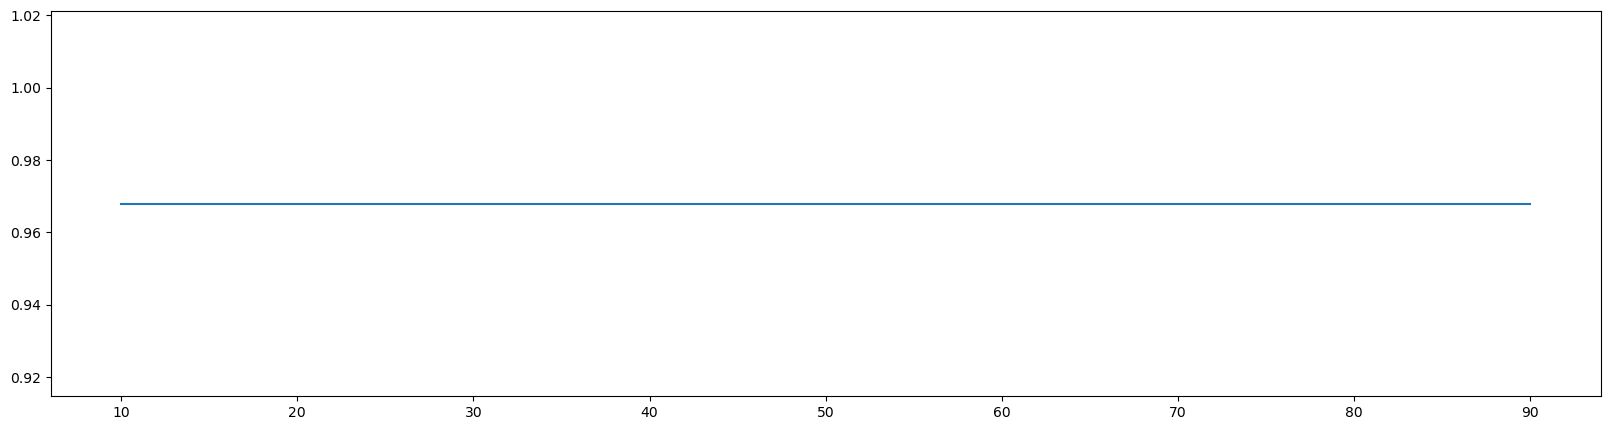

In [70]:
# max_depth rough range
import matplotlib.pyplot as plt
ScoreAll = []
for i in range(10,100,10):
    DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = i,random_state = 66)
    score = cross_val_score(DT,train_X_tfidf,train_y_tfidf,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("best value:",ScoreAll[max_score])
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

best value: [5.         0.96918528]


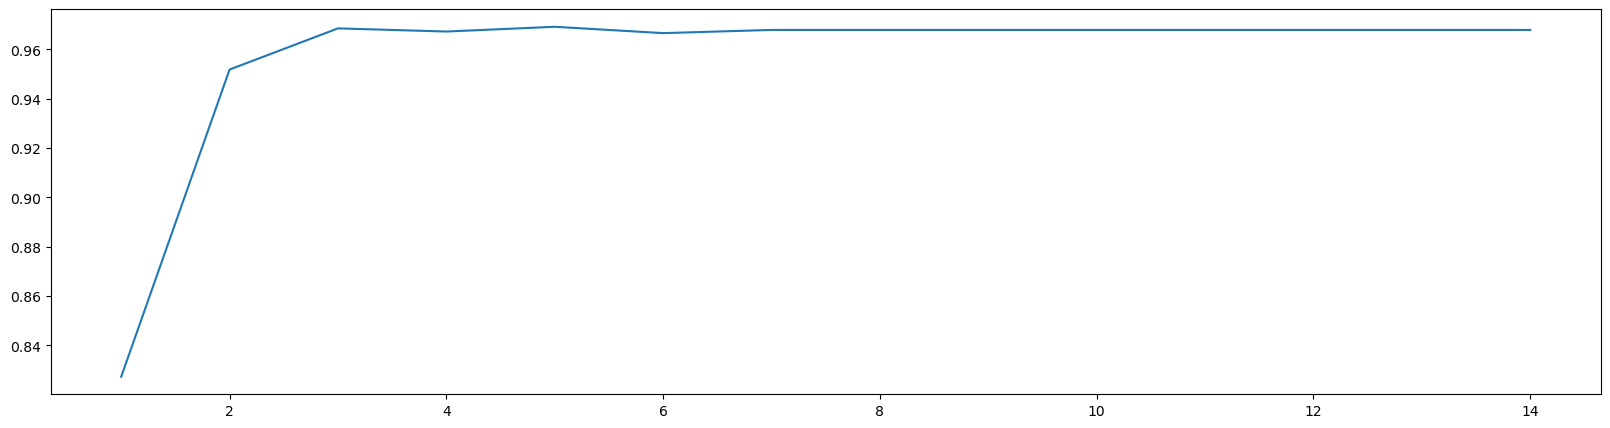

In [71]:
# max_depth exact value
ScoreAll = []
for i in range(1,15):
    DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = i,random_state = 66)
    score = cross_val_score(DT,train_X_tfidf,train_y_tfidf,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("best value:",ScoreAll[max_score])
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

best value: [25.         0.9704756]


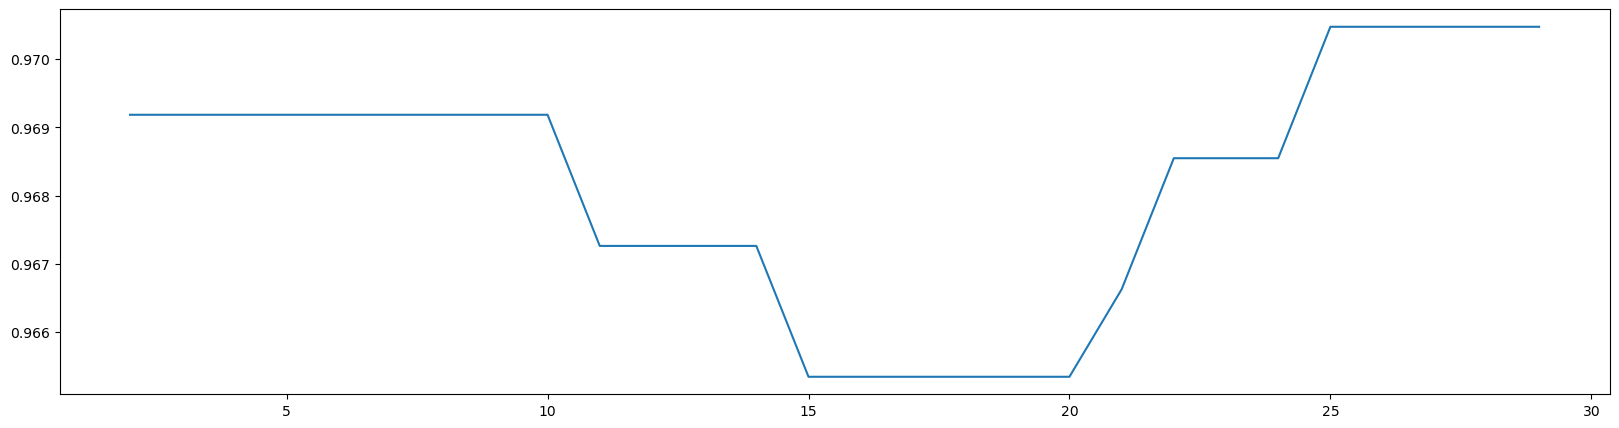

In [72]:
# min_samples_split
ScoreAll = []
for i in range(2,30):
    DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,
                                min_samples_split = i, random_state = 66)
    score = cross_val_score(DT,train_X_tfidf,train_y_tfidf,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("best value:",ScoreAll[max_score])
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

best value: [8.         0.97304797]


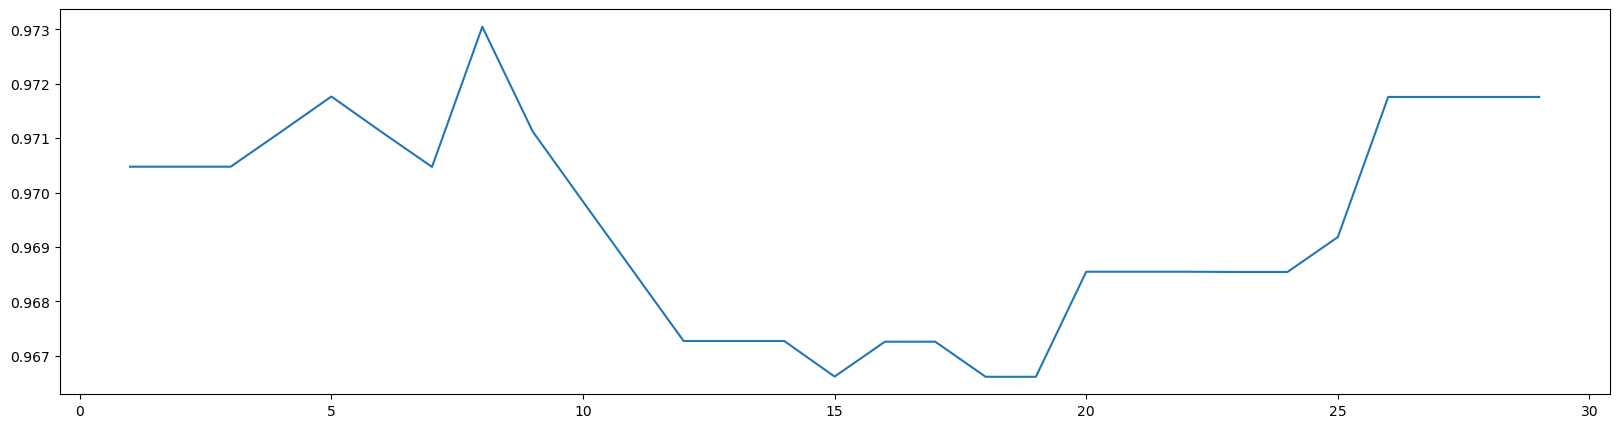

In [73]:
# min_samples_leaf
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

ScoreAll = []
for i in range(1,30):
    DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,
                                min_samples_leaf = i, min_samples_split = 25, random_state = 66)
    score = cross_val_score(DT,train_X_tfidf,train_y_tfidf,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("best value:",ScoreAll[max_score])
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [74]:
# Grid Search with max_depth, min_samples_leaf, and min_samples_split
param_grid = {
    'max_depth':np.arange(3, 7),
    'min_samples_leaf':np.arange(4, 9),
    'min_samples_split':np.arange(24, 28)}

rfc = DecisionTreeClassifier(random_state=66)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(train_X_tfidf,train_y_tfidf)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 25}
0.974325889164599


In [79]:
# best result {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 25}
dt_tfidf = DecisionTreeClassifier(criterion ='entropy', max_depth =5,
                                  min_samples_leaf = 8, min_samples_split =25, random_state =66)
dt_tfidf.fit(train_X_tfidf, train_y_tfidf)
y_pred_tfidf = dt_tfidf.predict(test_X_tfidf)

print("TF-IDF & Test dataset:\n")
print("Accuracy:", accuracy_score(test_y_tfidf, y_pred_tfidf))
print("F1:", f1_score(test_y_tfidf, y_pred_tfidf))
print("Confusion matrix:\n", confusion_matrix(test_y_tfidf, y_pred_tfidf))

TF-IDF & Test dataset:

Accuracy: 0.975
F1: 0.9115646258503401
Confusion matrix:
 [[440   0]
 [ 13  67]]


In [80]:
# with validation dataset
val_y_pred_tfidf = dt_tfidf.predict(val_X_tfidf)
print("TF-IDF & Validation dataset:\n")
print("Accuracy:", accuracy_score(val_y_tfidf, val_y_pred_tfidf))
print("F1:", f1_score(val_y_tfidf, val_y_pred_tfidf))
print("Confusion matrix:\n", confusion_matrix(val_y_tfidf, val_y_pred_tfidf))

TF-IDF & Validation dataset:

Accuracy: 0.9884393063583815
F1: 0.9577464788732395
Confusion matrix:
 [[445   2]
 [  4  68]]


In [81]:
# before hyperparameter tuning, for comparing the result

dt_tfidf_before = DecisionTreeClassifier(random_state = 66)
dt_tfidf_before.fit(train_X_tfidf, train_y_tfidf)
y_pred_tfidf = dt_tfidf_before.predict(test_X_tfidf)

print("Before hyperparameter tuning, TF-IDF & Test dataset:\n")
print("Accuracy:", accuracy_score(test_y_tfidf, y_pred_tfidf))
print("F1:", f1_score(test_y_tfidf, y_pred_tfidf))
print("Confusion matrix:\n", confusion_matrix(test_y_tfidf, y_pred_tfidf))

Before hyperparameter tuning, TF-IDF & Test dataset:

Accuracy: 0.9576923076923077
F1: 0.8513513513513514
Confusion matrix:
 [[435   5]
 [ 17  63]]


### DT with BoW

In [82]:
DT = DecisionTreeClassifier(random_state = 66)
score = cross_val_score(DT,train_X_bag,train_y_bag,cv=10).mean()
print('gini: %.4f'%score)
DT = DecisionTreeClassifier(criterion = 'entropy',random_state = 66)
score = cross_val_score(DT,train_X_tfidf,train_y_tfidf,cv=10).mean()
print('entropy: %.4f'%score)

gini: 0.9345
entropy: 0.9679


best value: [10.          0.93965674]


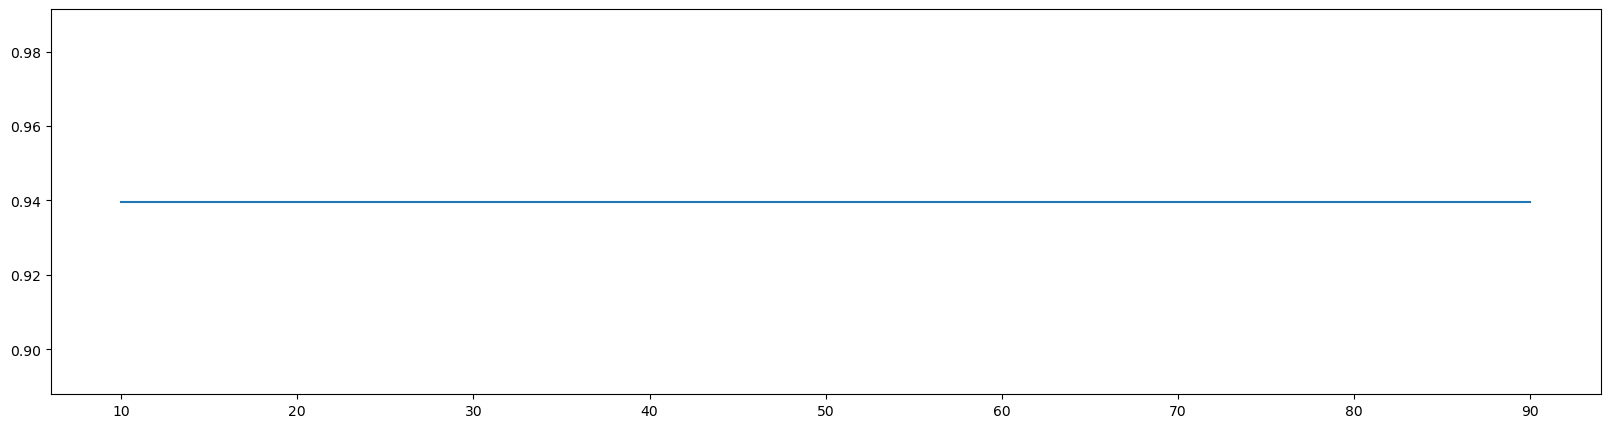

In [83]:
# max_depth rough range
import matplotlib.pyplot as plt
ScoreAll = []
for i in range(10,100,10):
    DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = i,random_state = 66)
    score = cross_val_score(DT,train_X_bag,train_y_bag,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("best value:",ScoreAll[max_score])
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

best value: [6.         0.94285773]


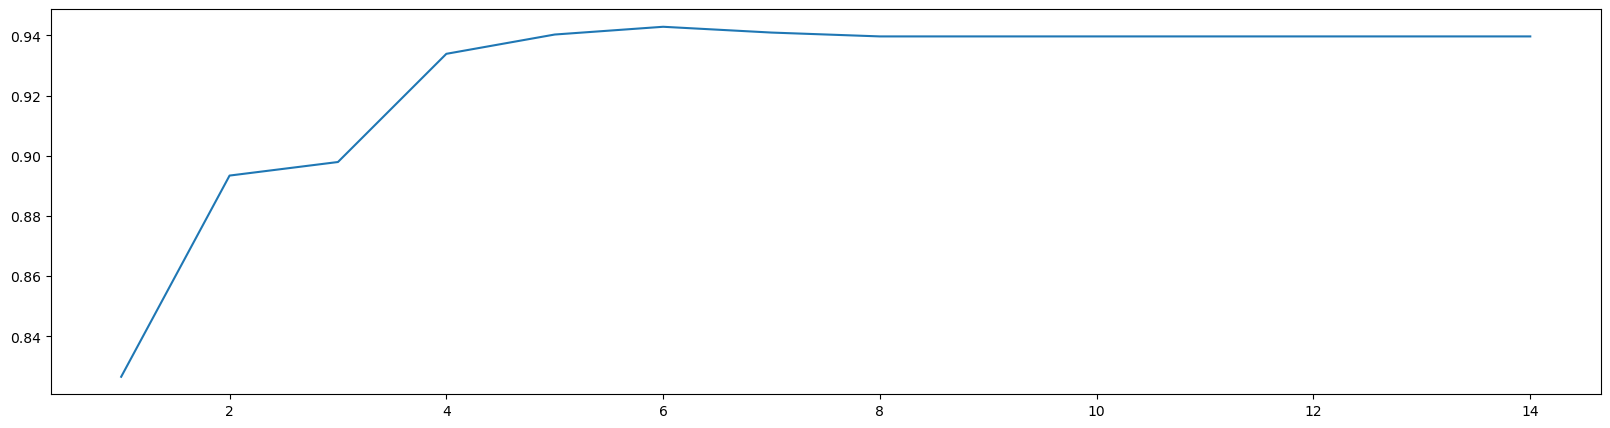

In [84]:
# max_depth exact value
ScoreAll = []
for i in range(1,15):
    DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = i,random_state = 66)
    score = cross_val_score(DT,train_X_bag,train_y_bag,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("best value:",ScoreAll[max_score])
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

best value: [36.          0.94349876]


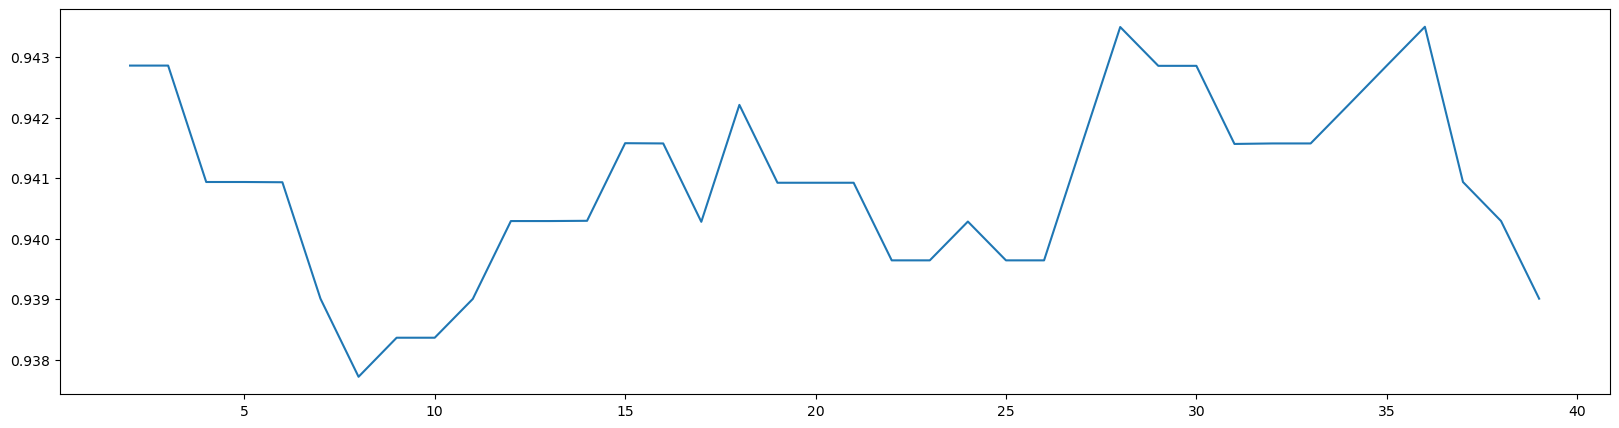

In [59]:
# min_samples_split
ScoreAll = []
for i in range(2, 40):
    DT = DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                min_samples_split=i, random_state=66)
    score = cross_val_score(DT, train_X_bag, train_y_bag, cv=10).mean()
    ScoreAll.append([i, score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:, 1]))[0][0]
print("best value:",ScoreAll[max_score])
# print(ScoreAll[,0])
plt.figure(figsize=[20, 5])
plt.plot(ScoreAll[:, 0], ScoreAll[:, 1])
plt.show()

best value: [2.         0.94543011]


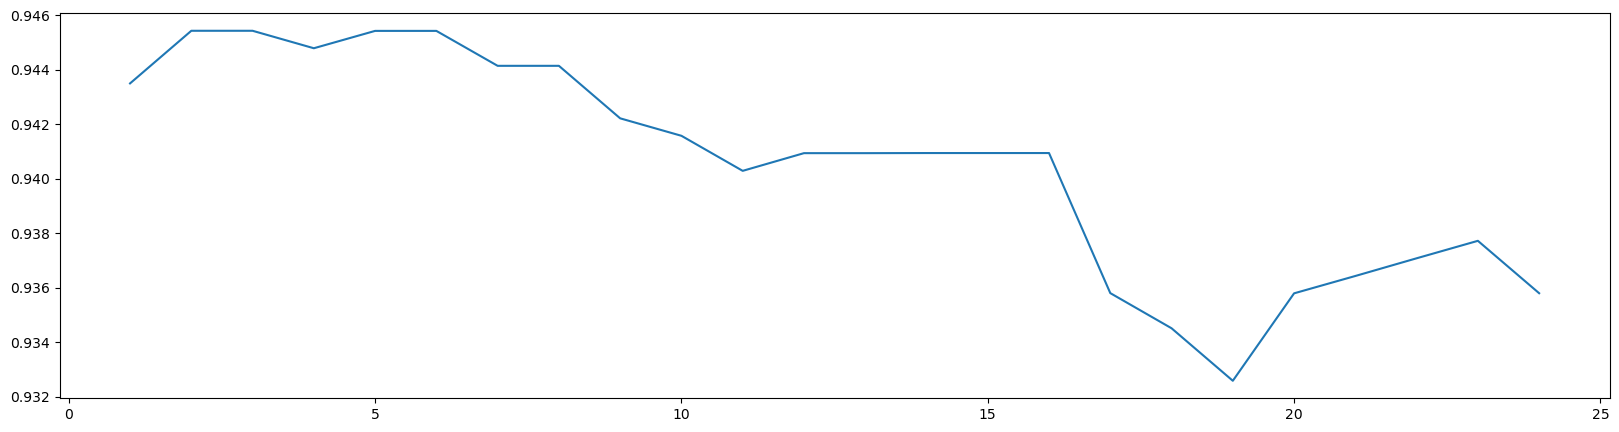

In [85]:
# min_samples_leaf
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

ScoreAll = []
for i in range(1,25):
    DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6,
                                min_samples_leaf = i, min_samples_split = 36, random_state = 66)
    score = cross_val_score(DT,train_X_bag,train_y_bag,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("best value:",ScoreAll[max_score])
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [86]:
# Grid Search with max_depth, min_samples_leaf, and min_samples_split
param_grid = {
    'max_depth':np.arange(4, 8),
    'min_samples_leaf':np.arange(2, 6),
    'min_samples_split':np.arange(27, 37)}

rfc = DecisionTreeClassifier(random_state=66)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(train_X_bag,train_y_bag)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 27}
0.9434780810587261


In [87]:
# best result {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 27}
dt_bag = DecisionTreeClassifier(criterion ='entropy', max_depth = 5,
                                  min_samples_leaf = 5, min_samples_split = 27, random_state = 66)
dt_bag.fit(train_X_bag, train_y_bag)

y_pred_bag = dt_bag.predict(test_X_bag)
print("BoW & Test dataset:\n")
print("Accuracy:", accuracy_score(test_y_bag, y_pred_bag))
print("F1:", f1_score(test_y_bag, y_pred_bag))
print("Confusion matrix:\n", confusion_matrix(test_y_bag, y_pred_bag))

BoW & Test dataset:

Accuracy: 0.925
F1: 0.7719298245614036
Confusion matrix:
 [[415  25]
 [ 14  66]]


In [88]:
# with validation dataset
val_y_pred_bag = dt_bag.predict(val_X_bag)
print("BoW & Validation dataset:\n")
print("Accuracy:", accuracy_score(val_y_bag, val_y_pred_bag))
print("F1:", f1_score(val_y_bag, val_y_pred_bag))
print("Confusion matrix:\n", confusion_matrix(val_y_bag, val_y_pred_bag))

BoW & Validation dataset:

Accuracy: 0.9499036608863198
F1: 0.8311688311688312
Confusion matrix:
 [[429  18]
 [  8  64]]


In [89]:
# before hyperparameter tuning, for comparing the result

dt_bag_before = DecisionTreeClassifier(random_state = 66)
dt_bag_before.fit(train_X_bag, train_y_bag)
y_pred_bag = dt_bag_before.predict(test_X_bag)

print("Before hyperparameter tuning, BoW & Test dataset:\n")
print("Accuracy:", accuracy_score(test_y_bag, y_pred_bag))
print("F1:", f1_score(test_y_bag, y_pred_bag))
print("Confusion matrix:\n", confusion_matrix(test_y_bag, y_pred_bag))

Before hyperparameter tuning, BoW & Test dataset:

Accuracy: 0.9096153846153846
F1: 0.6887417218543047
Confusion matrix:
 [[421  19]
 [ 28  52]]


## Naive Bayes

In [34]:
# IDIDF - NB
# Naive Bayes does not work with SVD or other matrix factorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['main_body'])
df1 = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
df1

,aa,aaa,aaai,aaainumbers,aaal,aaanumbers,aaarghh,aaas,aabb,aabyhoej,...,zwischen,zwitserlood,zxgahnumbersqabjh,zybatov,zybatow,zygmunt,zyokyoozyu,zytkow,zzlsa,zznumbers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.model_selection import train_test_split

train_val_X_tfidf, test_X_tfidf, train_val_y_tfidf, test_y_tfidf = train_test_split(df1, df['label'], test_size=0.2, random_state=42)
train_X_tfidf, val_X_tfidf, train_y_tfidf, val_y_tfidf = train_test_split(train_val_X_tfidf, train_val_y_tfidf, test_size=0.25, random_state=42)

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [38]:
mnb_1 = MultinomialNB(alpha=1.0) # the default value of alpha
mnb_1.fit(train_X_tfidf,train_y_tfidf)

# Evaluate the performance of the model on the validation set
y_pred = mnb_1.predict(val_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,val_y_tfidf))
print("F1 score: ", f1_score(y_pred,val_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[442  74]
 [  0   3]]
Accuracy:  0.8574181117533719
F1 score:  0.9178554189243003


In [39]:
mnb_05 = MultinomialNB(alpha=0.5)
mnb_05.fit(train_X_tfidf,train_y_tfidf)

# Evaluate the performance of the model on the validation set
y_pred = mnb_05.predict(val_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,val_y_tfidf))
print("F1 score: ", f1_score(y_pred,val_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[442  67]
 [  0  10]]
Accuracy:  0.8709055876685935
F1 score:  0.9160668658212969


In [40]:
mnb_025 = MultinomialNB(alpha=0.25)
mnb_025.fit(train_X_tfidf,train_y_tfidf)

# Evaluate the performance of the model on the validation set
y_pred = mnb_025.predict(val_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,val_y_tfidf))
print("F1 score: ", f1_score(y_pred,val_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[442  33]
 [  0  44]]
Accuracy:  0.9364161849710982
F1 score:  0.9439426125654781


In [41]:
mnb_01 = MultinomialNB(alpha=0.1)
mnb_01.fit(train_X_tfidf,train_y_tfidf)

# Evaluate the performance of the model on the validation set
y_pred = mnb_01.predict(val_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,val_y_tfidf))
print("F1 score: ", f1_score(y_pred,val_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[442   8]
 [  0  69]]
Accuracy:  0.9845857418111753
F1 score:  0.9849389280206742


In [42]:
mnb_001 = MultinomialNB(alpha=0.01)
mnb_001.fit(train_X_tfidf,train_y_tfidf)

# Evaluate the performance of the model on the validation set
y_pred = mnb_001.predict(val_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,val_y_tfidf))
print("F1 score: ", f1_score(y_pred,val_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[441   1]
 [  1  76]]
Accuracy:  0.9961464354527938
F1 score:  0.9961464354527938


We see that the optimal alpha for tfidf vectors is 0.01. Now we can evaluate the final model with the alpha = 0.01 on the test set to obtain an unbiased estimate of its performance.

In [43]:
# Evaluate the performance of the model on the test set
y_pred = mnb_001.predict(test_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,test_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,test_y_tfidf))
print("F1 score: ", f1_score(y_pred,test_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[422   1]
 [  7  90]]
Accuracy:  0.9846153846153847
F1 score:  0.9844240566146468


In [44]:
# BoW - NB

In [45]:
df2 = pd.DataFrame(word_vectors, columns=vocab)
df2

,number,university,language,paper,email,information,linguistics,address,use,de,...,lifet,erform,promoti,onal,tow,urchase,crespo,tvsrnumbers,promotio,uarantee
0,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89,6,4,2,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,6,0,0,1,3,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2592,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2593,22,0,0,0,10,3,0,3,4,0,...,0,0,0,0,0,0,0,0,0,0
2594,26,0,0,0,3,3,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train_val_X_bag, test_X_bag, train_val_y_bag, test_y_bag = train_test_split(df2, df['label'], test_size=0.2, random_state=42)
train_X_bag, val_X_bag, train_y_bag, val_y_bag = train_test_split(train_val_X_bag, train_val_y_bag, test_size=0.25, random_state=42)

In [47]:
mnb_1 = MultinomialNB(alpha=1.0) # the default value of alpha
mnb_1.fit(train_X_bag,train_y_bag)

# Evaluate the performance of the model on the validation set
y_pred = mnb_1.predict(val_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_bag))
print("Accuracy: ", accuracy_score(y_pred,val_y_bag))
print("F1 score: ", f1_score(y_pred,val_y_bag, average = 'weighted'))

Confusion Matrix:
 [[439   2]
 [  3  75]]
Accuracy:  0.9903660886319846
F1 score:  0.9903404667144894


In [48]:
mnb_05 = MultinomialNB(alpha=0.5) 
mnb_05.fit(train_X_bag,train_y_bag)

# Evaluate the performance of the model on the validation set
y_pred = mnb_05.predict(val_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_bag))
print("Accuracy: ", accuracy_score(y_pred,val_y_bag))
print("F1 score: ", f1_score(y_pred,val_y_bag, average = 'weighted'))

Confusion Matrix:
 [[437   2]
 [  5  75]]
Accuracy:  0.9865125240847784
F1 score:  0.9864066267703201


In [49]:
mnb_075 = MultinomialNB(alpha=0.75) 
mnb_075.fit(train_X_bag,train_y_bag)

# Evaluate the performance of the model on the validation set
y_pred = mnb_075.predict(val_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_bag))
print("Accuracy: ", accuracy_score(y_pred,val_y_bag))
print("F1 score: ", f1_score(y_pred,val_y_bag, average = 'weighted'))

Confusion Matrix:
 [[438   2]
 [  4  75]]
Accuracy:  0.9884393063583815
F1 score:  0.9883783067102637


In [50]:
mnb_01 = MultinomialNB(alpha=0.1) 
mnb_01.fit(train_X_bag,train_y_bag)

# Evaluate the performance of the model on the validation set
y_pred = mnb_01.predict(val_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_bag))
print("Accuracy: ", accuracy_score(y_pred,val_y_bag))
print("F1 score: ", f1_score(y_pred,val_y_bag, average = 'weighted'))

Confusion Matrix:
 [[438   2]
 [  4  75]]
Accuracy:  0.9884393063583815
F1 score:  0.9883783067102637


We see that the optimal alpha for bag of words vectors is 1.0. Now we can evaluate the final model with the alpha = 1.0 on the test set to obtain an unbiased estimate of its performance.

In [51]:
# Evaluate the performance of the model on the test set
y_pred = mnb_1.predict(test_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,test_y_bag))
print("Accuracy: ", accuracy_score(y_pred,test_y_bag))
print("F1 score: ", f1_score(y_pred,test_y_bag, average = 'weighted'))

Confusion Matrix:
 [[427   2]
 [  2  89]]
Accuracy:  0.9923076923076923
F1 score:  0.9923076923076923


In [52]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()

In [53]:
gauss.fit(train_X_tfidf,train_y_tfidf)

# Evaluate the performance of the model on the validation set
y_pred = gauss.predict(val_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,val_y_tfidf))
print("F1 score: ", f1_score(y_pred,val_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[441  26]
 [  1  51]]
Accuracy:  0.9479768786127167
F1 score:  0.9523024892891224


In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=10)}

gs_NB = GridSearchCV(estimator=gauss, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='f1')

Data_transformed = PowerTransformer().fit_transform(val_X_tfidf)

gs_NB.fit(Data_transformed, val_y_tfidf)

C:\Users\Johnny\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 15 folds for each of 10 candidates, totalling 150 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             scoring='f1', verbose=1)

In [56]:
gs_NB.best_params_

{'var_smoothing': 0.001}

In [57]:
gauss_0001 = GaussianNB(var_smoothing = 0.001)

gauss_0001.fit(train_X_tfidf,train_y_tfidf)

# Evaluate the performance of the model on the validation set
y_pred = gauss_0001.predict(val_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,val_y_tfidf))
print("F1 score: ", f1_score(y_pred,val_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[367   0]
 [ 75  77]]
Accuracy:  0.8554913294797688
F1 score:  0.8385257318428402


It turned out that the default var_smoothing for gaussian naive bayes is the best. The "best" var_smoothing value found by grid search yielded worse results than the default value.

In [58]:
# Evaluate the performance of the model on the test set
y_pred = gauss.predict(test_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,test_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,test_y_tfidf))
print("F1 score: ", f1_score(y_pred,test_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[428  30]
 [  1  61]]
Accuracy:  0.9403846153846154
F1 score:  0.9450598925431474


Now do the same things with bag of words

In [59]:
gauss.fit(train_X_bag,train_y_bag)

# Evaluate the performance of the model on the validation set
y_pred = gauss.predict(val_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_bag))
print("Accuracy: ", accuracy_score(y_pred,val_y_bag))
print("F1 score: ", f1_score(y_pred,val_y_bag, average = 'weighted'))

Confusion Matrix:
 [[442  27]
 [  0  50]]
Accuracy:  0.9479768786127167
F1 score:  0.95273597104176


In [60]:
gauss_0001 = GaussianNB(var_smoothing = 0.001) # Supposedly the best performing var_smoothing

gauss_0001.fit(train_X_bag,train_y_bag)

# Evaluate the performance of the model on the validation set
y_pred = gauss_0001.predict(val_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,val_y_bag))
print("Accuracy: ", accuracy_score(y_pred,val_y_bag))
print("F1 score: ", f1_score(y_pred,val_y_bag, average = 'weighted'))

Confusion Matrix:
 [[210   1]
 [232  76]]
Accuracy:  0.5510597302504817
F1 score:  0.4957843892277233


In [61]:
# Evaluate the performance of the model on the test set
y_pred = gauss.predict(test_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,test_y_bag))
print("Accuracy: ", accuracy_score(y_pred,test_y_bag))
print("F1 score: ", f1_score(y_pred,test_y_bag, average = 'weighted'))

Confusion Matrix:
 [[427  23]
 [  2  68]]
Accuracy:  0.9519230769230769
F1 score:  0.9544842307121577


Schneider [25] found that the multinomial nb surprisingly performs even better when term frequencies are replaced by Boolean attributes.

In [62]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
df1_bool = binarizer.transform(df1.values)

In [63]:
train_val_X_tfidf, boo_test_X_tfidf, train_val_y_tfidf, boo_test_y_tfidf = train_test_split(df1_bool, df['label'], test_size=0.2, random_state=42)
boo_train_X_tfidf, boo_val_X_tfidf, boo_train_y_tfidf, boo_val_y_tfidf = train_test_split(train_val_X_tfidf, train_val_y_tfidf, test_size=0.25, random_state=42)

In [71]:
from sklearn.naive_bayes import BernoulliNB
berNB = BernoulliNB(alpha = 1.0) #default alpha
berNB.fit(boo_train_X_tfidf,boo_train_y_tfidf)

# Evaluate the performance of the model on the validation set
y_pred = berNB.predict(boo_val_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,boo_val_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,boo_val_y_tfidf))
print("F1 score: ", f1_score(y_pred,boo_val_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[438  45]
 [  4  32]]
Accuracy:  0.905587668593449
F1 score:  0.920623188025101


In [72]:
berNB_001 = BernoulliNB(alpha = 0.01) #optimal
berNB_001.fit(boo_train_X_tfidf,boo_train_y_tfidf)

# Evaluate the performance of the model on the validation set
y_pred = berNB_001.predict(boo_val_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,boo_val_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,boo_val_y_tfidf))
print("F1 score: ", f1_score(y_pred,boo_val_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[435   1]
 [  7  76]]
Accuracy:  0.9845857418111753
F1 score:  0.9843493927782971


In [73]:
# Evaluate the performance of the model on the test set
y_pred = berNB_001.predict(boo_test_X_tfidf)
print("Confusion Matrix:\n", confusion_matrix(y_pred,boo_test_y_tfidf))
print("Accuracy: ", accuracy_score(y_pred,boo_test_y_tfidf))
print("F1 score: ", f1_score(y_pred,boo_test_y_tfidf, average = 'weighted'))

Confusion Matrix:
 [[416   1]
 [ 13  90]]
Accuracy:  0.9730769230769231
F1 score:  0.9724351944027311


In [74]:
df2_bool = binarizer.transform(df2.values)
train_val_X_bag, boo_test_X_bag, train_val_y_bag, boo_test_y_bag = train_test_split(df2_bool, df['label'], test_size=0.2, random_state=42)
boo_train_X_bag, boo_val_X_bag, boo_train_y_bag, boo_val_y_bag = train_test_split(train_val_X_bag, train_val_y_bag, test_size=0.25, random_state=42)

In [78]:
berNB_001 = BernoulliNB(alpha = 0.01) #optimal
berNB_001.fit(boo_train_X_bag,boo_train_y_bag)

# Evaluate the performance of the model on the validation set
y_pred = berNB_001.predict(boo_val_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,boo_val_y_bag))
print("Accuracy: ", accuracy_score(y_pred,boo_val_y_bag))
print("F1 score: ", f1_score(y_pred,boo_val_y_bag, average = 'weighted'))

Confusion Matrix:
 [[435   1]
 [  7  76]]
Accuracy:  0.9845857418111753
F1 score:  0.9843493927782971


In [79]:
# Evaluate the performance of the model on the test set
y_pred = berNB_001.predict(boo_test_X_bag)
print("Confusion Matrix:\n", confusion_matrix(y_pred,boo_test_y_bag))
print("Accuracy: ", accuracy_score(y_pred,boo_test_y_bag))
print("F1 score: ", f1_score(y_pred,boo_test_y_bag, average = 'weighted'))

Confusion Matrix:
 [[417   0]
 [ 12  91]]
Accuracy:  0.9769230769230769
F1 score:  0.9763730237737694


## Logistic Regression

### TFIDF

In [30]:
from sklearn.linear_model import LogisticRegression

X = vectors_tfidf  # features
y = df['label']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [31]:
# model evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("TFIDF performance BEFORE hyperparameter tuning:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion matrix:")
confusion

TFIDF performance BEFORE hyperparameter tuning:
Accuracy: 0.9384615384615385
F1 Score: 0.7499999999999999
Confusion matrix:


array([[440,   0],
       [ 32,  48]])

### TFIDF + Tuning

In [32]:
### Create a logistic regression object
logreg = LogisticRegression()

# Define the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Type of regularization
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv = 5, scoring = 'f1')

# Train the GridSearchCV object on the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Use the best hyperparameters to make predictions
y_pred = grid_search.predict(X_test)

Best hyperparameters: {'C': 100, 'penalty': 'l2'}


In [33]:
# model evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# final performance after tuning hyperparameter
print("TFIDF performance AFTER hyperparameter tuning:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion matrix:")
confusion

TFIDF performance AFTER hyperparameter tuning:
Accuracy: 0.9711538461538461
F1 Score: 0.896551724137931
Confusion matrix:


array([[440,   0],
       [ 15,  65]])

### BoW

In [34]:
X = word_vectors  # features
y = df['label']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

y_pred = lr2.predict(X_test)

In [35]:
# model evaluation
accuracy2 = accuracy_score(y_test, y_pred)
confusion2 = confusion_matrix(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)

print("BoW performance BEFORE hyperparameter tuning:")
print(f"Accuracy: {accuracy2}")
print(f"F1 Score: {f1_2}")
print("Confusion matrix:")
confusion2

BoW performance BEFORE hyperparameter tuning:
Accuracy: 0.9807692307692307
F1 Score: 0.935064935064935
Confusion matrix:


array([[438,   2],
       [  8,  72]])

### BoW + Tuning

In [36]:
# Create a logistic regression object
logreg2 = LogisticRegression()

# Define the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Type of regularization
}

# Create a GridSearchCV object
grid_search2 = GridSearchCV(logreg2, param_grid, cv = 5, scoring = 'f1')

# Train the GridSearchCV object on the data
grid_search2.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search2.best_params_)

# Use the best hyperparameters to make predictions
y_pred = grid_search2.predict(X_test)

Best hyperparameters: {'C': 100, 'penalty': 'l2'}


In [37]:
# model evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# final performance after tuning hyperparameter
print("BoW performance AFTER hyperparameter tuning:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion matrix:")
confusion

BoW performance AFTER hyperparameter tuning:
Accuracy: 0.9788461538461538
F1 Score: 0.9290322580645162
Confusion matrix:


array([[437,   3],
       [  8,  72]])

## Random Forest

### TF-IDF + Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix

In [48]:
rf = RandomForestClassifier(random_state = 0) 
rf.fit( train_X_tfidf, train_y_tfidf)

RandomForestClassifier(random_state=0)

In [49]:
rf_bag = RandomForestClassifier(random_state = 0) 
rf_bag.fit( train_X_bag, train_y_bag)

RandomForestClassifier(random_state=0)

In [50]:
predic_tfidf = rf.predict(val_X_tfidf)
predic_bag = rf_bag.predict(val_X_bag)

In [51]:
#mesure for tf-idf feature
accuracy_tfdif_ori = accuracy_score(predic_tfidf,val_y_tfidf)
f1_tfidf_ori = f1_score(predic_tfidf,val_y_tfidf)
cm_tfidf_ori = confusion_matrix(predic_tfidf,val_y_tfidf)

#mesure for BOW feature
accuracy_bag_ori = accuracy_score(predic_bag,val_y_bag)
f1_bag_ori = f1_score(predic_bag,val_y_bag)
cm_bag_ori = confusion_matrix(predic_bag,val_y_bag)

In [52]:
print('mesure for tf-idf feature with original model:')
print('accuracy is        :',accuracy_tfdif_ori)
print('f1 is              :',f1_tfidf_ori)
print('confusion matrix is:\n',cm_tfidf_ori)

mesure for tf-idf feature with original model:
accuracy is        : 0.9691714836223507
f1 is              : 0.8750000000000001
confusion matrix is:
 [[447  16]
 [  0  56]]


In [53]:
print('mesure for BOW feature with original model:')
print('accuracy is        :',accuracy_bag_ori)
print('f1 is              :',f1_bag_ori)
print('confusion matrix is:\n',cm_bag_ori)

mesure for BOW feature with original model:
accuracy is        : 0.9730250481695568
f1 is              : 0.893939393939394
confusion matrix is:
 [[446  13]
 [  1  59]]


In [54]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [55]:
rf_bag.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Optimize the RF model by several hyperparameter

#### the model with tf-idf feature

In [56]:
from sklearn.model_selection import ParameterGrid

params_grid = {
                'n_estimators':[100,200,400,800],
               'max_depth':[5,15,25],
                'min_samples_split' :[2,3,4,5],
               'min_samples_leaf': [1,10,20],
#                'min_weight_fraction_leaf': [0.0,0.25,0.5] #best performance got from 0.0
              }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 144


In [57]:
# optimize model for tf-idf feature input
model_parameters = pd.DataFrame(columns = ['f1','Parameters'])
max_f1 = 0
max_parameters = []
for p in grid:
    test = pd.DataFrame()
    print(p)
    train_model =RandomForestClassifier(
                                        n_estimators = p['n_estimators'],
                                        max_depth = p['max_depth'],
                                        min_samples_split = p['min_samples_split'],
                                        min_samples_leaf = p['min_samples_leaf'],
#                                         min_weight_fraction_leaf = p['min_weight_fraction_leaf'],       
                                        random_state = 0,
                                        class_weight = 'balanced',
                                        )
    train_model.fit(train_X_tfidf,train_y_tfidf)
    val_tfidf_forecast = train_model.predict(val_X_tfidf)
    f1 = f1_score(val_y_tfidf, val_tfidf_forecast)
    print('F1 score is------------------------------------',f1)
    if f1 > max_f1:
        max_f1 = f1
        max_parameters = p
    model_parameters = model_parameters.append({'f1':f1,'Parameters':p},ignore_index=True)
    

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
F1 score is------------------------------------ 0.9343065693430657
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
F1 score is------------------------------------ 0.9428571428571428
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
F1 score is------------------------------------ 0.9352517985611511
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
F1 score is------------------------------------ 0.949640287769784
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
F1 score is------------------------------------ 0.9343065693430657
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
F1 score is------------------------------------ 0.9428571428571428
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400}
F1 s

In [58]:
print("max f1_score for tf-idf feature is", max_f1)
print('The best paremeters are',max_parameters)

max f1_score for tf-idf feature is 0.9714285714285714
The best paremeters are {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 800}


In [59]:
tfidf_model_parameters = model_parameters['Parameters'].apply(pd.Series)
tfidf_model_parameters['f1'] = model_parameters['f1']
tfidf_model_parameters.nlargest(10, 'f1')

,max_depth,min_samples_leaf,min_samples_split,n_estimators,f1
55,15,1,3,800,0.971429
60,15,1,5,100,0.971429
67,15,10,2,800,0.965986
71,15,10,3,800,0.965986
75,15,10,4,800,0.965986
79,15,10,5,800,0.965986
113,25,10,2,200,0.965986
114,25,10,2,400,0.965986
115,25,10,2,800,0.965986
117,25,10,3,200,0.965986


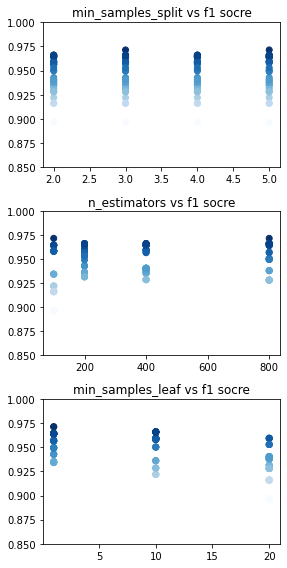

In [60]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)
fig.set_figheight(8)
fig.set_figwidth(4)

p1 = axs[0].scatter(tfidf_model_parameters['min_samples_split'], tfidf_model_parameters['f1'], c=tfidf_model_parameters['f1'],cmap = 'Blues')
axs[0].set_title('min_samples_split vs f1 socre')
axs[0].set_ylim([0.85, 1])
axs[1].scatter(tfidf_model_parameters['n_estimators'], tfidf_model_parameters['f1'],c=tfidf_model_parameters['f1'],cmap = 'Blues')
axs[1].set_title('n_estimators vs f1 socre')
axs[1].set_ylim([0.85, 1])
axs[2].scatter(tfidf_model_parameters['min_samples_leaf'], tfidf_model_parameters['f1'],c=tfidf_model_parameters['f1'],cmap = 'Blues')
axs[2].set_title('min_samples_leaf vs f1 socre')
axs[2].set_ylim([0.85, 1])

fig.tight_layout()

In [61]:
rfopt = RandomForestClassifier(random_state = 0,
                               n_estimators = 800,
                               max_depth= 15, 
                               min_samples_leaf=1, 
                               min_samples_split = 3,
                              class_weight = 'balanced') 
rfopt.fit(train_X_tfidf, train_y_tfidf) 
predic_tfidf_opt = rfopt.predict(val_X_tfidf)

In [62]:
accuracy_tfdif_opt_val = accuracy_score(predic_tfidf_opt,val_y_tfidf)
f1_tfdif_opt_val = f1_score(predic_tfidf_opt,val_y_tfidf)
cm_tfdif_opt_val = confusion_matrix(predic_tfidf_opt,val_y_tfidf)

In [63]:
print('mesure for tf-idf feature with optimized model on validation data:')
print('accuracy is        :',accuracy_tfdif_opt_val)
print('f1 is              :',f1_tfdif_opt_val)
print('confusion matrix is:\n',cm_tfdif_opt_val)

mesure for tf-idf feature with optimized model on validation data:
accuracy is        : 0.9922928709055877
f1 is              : 0.9714285714285714
confusion matrix is:
 [[447   4]
 [  0  68]]


In [64]:
predic_tfidf_test = rfopt.predict(test_X_tfidf)
accuracy_tfdif_opt_test = accuracy_score(predic_tfidf_test,test_y_tfidf)
f1_tfdif_opt_test = f1_score(predic_tfidf_test,test_y_tfidf)
cm_tfdif_opt_test = confusion_matrix(predic_tfidf_test,test_y_tfidf)

In [65]:
print('mesure for tf-idf feature with optimized model on test data:')
print('accuracy is        :',accuracy_tfdif_opt_test)
print('f1 is              :',f1_tfdif_opt_test)
print('confusion matrix is:\n',cm_tfdif_opt_test)

mesure for tf-idf feature with optimized model on test data:
accuracy is        : 0.9826923076923076
f1 is              : 0.9411764705882354
confusion matrix is:
 [[439   8]
 [  1  72]]


#### the model with BOW feature

In [66]:
params_grid = {
                'n_estimators':[100,200,400,800],
               'max_depth':[5,15,25],
                'min_samples_split' :[2,3,4,5],
               'min_samples_leaf': [1,10,20],
#                'min_weight_fraction_leaf': [0.0,0.25,0.5] #best performance got from 0.0
              }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 144


In [67]:
# optimize model for bag feature input
model_parameters_bag = pd.DataFrame(columns = ['f1','Parameters'])
max_f1_bag = 0
max_parameters_bag = []
for p in grid:
    test = pd.DataFrame()
    print(p)
    train_model =RandomForestClassifier(
                                        n_estimators = p['n_estimators'],
                                        max_depth = p['max_depth'],
                                        min_samples_split = p['min_samples_split'],
                                        min_samples_leaf = p['min_samples_leaf'],         
#                                         min_weight_fraction_leaf = p['min_weight_fraction_leaf'], #decrease perfomance       
                                        random_state = 0,
                                        class_weight = 'balanced'
                                        )
    train_model.fit(train_X_bag,train_y_bag)
    val_bag_forecast = train_model.predict(val_X_bag)
    f1 = f1_score(val_y_bag, val_bag_forecast)
    print('F1 score is------------------------------------',f1)
    if f1 > max_f1_bag:
        max_f1_bag = f1
        max_parameters_bag = p
    model_parameters_bag = model_parameters_bag.append({'f1':f1,'Parameters':p},ignore_index=True)
    

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
F1 score is------------------------------------ 0.9130434782608695
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
F1 score is------------------------------------ 0.9208633093525178
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
F1 score is------------------------------------ 0.9051094890510949
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
F1 score is------------------------------------ 0.9197080291970802
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
F1 score is------------------------------------ 0.9064748201438849
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
F1 score is------------------------------------ 0.9208633093525178
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400}
F1 

In [68]:
print("max f1_score for bow feature is", max_f1_bag)
print('The best paremeters are',max_parameters_bag)

max f1_score for bow feature is 0.9859154929577464
The best paremeters are {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [69]:
bow_model_parameters = model_parameters_bag['Parameters'].apply(pd.Series)
bow_model_parameters['f1'] = model_parameters_bag['f1']
bow_model_parameters.nlargest(10, 'f1')

,max_depth,min_samples_leaf,min_samples_split,n_estimators,f1
50,15,1,2,400,0.985915
51,15,1,2,800,0.985915
54,15,1,3,400,0.985915
55,15,1,3,800,0.985915
58,15,1,4,400,0.985915
59,15,1,4,800,0.985915
63,15,1,5,800,0.985915
99,25,1,2,800,0.985915
103,25,1,3,800,0.985915
107,25,1,4,800,0.985915


In [70]:
rfopt_bag = RandomForestClassifier(random_state = 0,
                               n_estimators = 800,
                               max_depth= 15, 
                               min_samples_leaf=1, 
                               min_samples_split = 2,
                              class_weight = 'balanced') 
rfopt_bag.fit(train_X_bag, train_y_bag) 
predic_bag_opt = rfopt_bag.predict(val_X_bag)

In [71]:
accuracy_bag_opt_val = accuracy_score(predic_bag_opt,val_y_bag)
f1_bag_opt_val = f1_score(predic_bag_opt,val_y_bag)
cm_bag_opt_val = confusion_matrix(predic_bag_opt,val_y_bag)

In [72]:
print('mesure for BOW feature with optimized model on validation data:')
print('accuracy is        :',accuracy_bag_opt_val)
print('f1 is              :',f1_bag_opt_val)
print('confusion matrix is:\n',cm_bag_opt_val)

mesure for BOW feature with optimized model on validation data:
accuracy is        : 0.9961464354527938
f1 is              : 0.9859154929577464
confusion matrix is:
 [[447   2]
 [  0  70]]


In [73]:
predic_bag_test = rfopt_bag.predict(test_X_bag)
accuracy_bag_opt_test = accuracy_score(predic_bag_test,test_y_bag)
f1_bag_opt_test = f1_score(predic_bag_test,test_y_bag)
cm_bag_opt_test = confusion_matrix(predic_bag_test,test_y_bag)

In [74]:
print('mesure for BOW feature with optimized model on test data:')
print('accuracy is        :',accuracy_bag_opt_test)
print('f1 is              :',f1_bag_opt_test)
print('confusion matrix is:\n',cm_bag_opt_test)

mesure for BOW feature with optimized model on test data:
accuracy is        : 0.9846153846153847
f1 is              : 0.9473684210526316
confusion matrix is:
 [[440   8]
 [  0  72]]
